# Project 1 - Deep Learning - MNIST dataset - Karin Shulman Goren

## Student details:

## Imports:

In [2]:
import torch
from torchvision import datasets, transforms
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Subset
import numpy as np
import matplotlib.pyplot as plt

## Turn data into tensors and create train and test splits:

In [3]:
# Define a transform to normalize the data
data_transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,)),])

# Download and split data into train and test sets
train_set = datasets.MNIST('./MNIST_data', download = True, train = True, transform = data_transform)
test_set = datasets.MNIST('./MNIST_data', download = True, train = False, transform = data_transform)

## Exploring the data:

In [4]:
print("Train set samples = " , len(train_set))
print("Test set samples = " , len(test_set))

Train set samples =  60000
Test set samples =  10000


In [5]:
# Examine the data:
def class_plot_dist(data, chart_title, bar_color):
    labels = [label for k, label in data]
    unique_labels, counts = np.unique(labels, return_counts = True)
    plt.bar(unique_labels, counts, color = bar_color)
    plt.title(chart_title)
    plt.xlabel('Class')
    plt.ylabel('Samples')
    plt.xticks(unique_labels)
    plt.show()

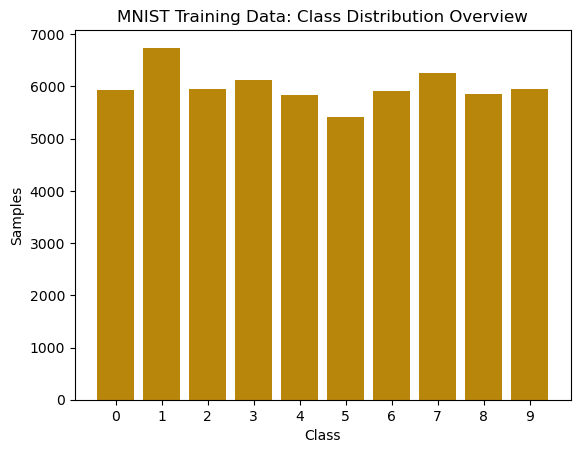

In [6]:
# Examine train_set class distribution:
class_plot_dist(train_set, 'MNIST Training Data: Class Distribution Overview', 'darkgoldenrod')

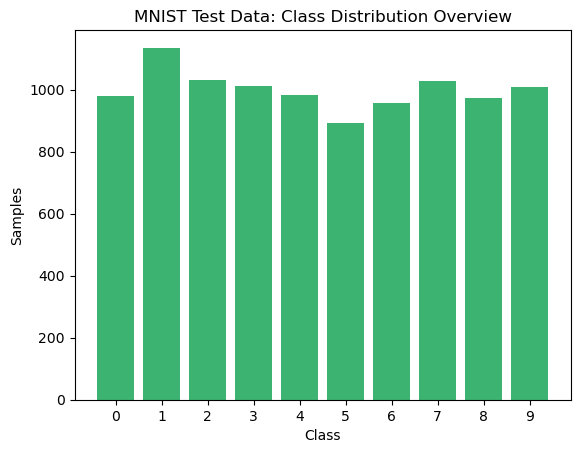

In [7]:
# Examine test_set class distribution:
class_plot_dist(test_set, 'MNIST Test Data: Class Distribution Overview', 'mediumseagreen')

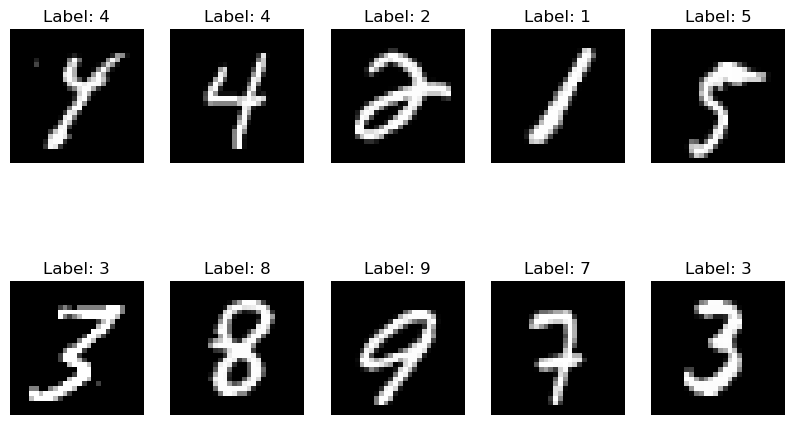

In [8]:
# Creating DataLoader:
trainloader_samples = torch.utils.data.DataLoader(train_set, batch_size = 10, shuffle = True)

# Iterating through DataLoader:
for img, label in trainloader_samples:
    break
    
def show_samples(images, titles):
    rows = 2
    cols = 5

    fig, axes = plt.subplots(rows, cols, figsize = (10, 6))
    for i in range(rows):
        for j in range(cols):
            index = i * cols + j
            axes[i, j].imshow(images[index], cmap = 'gray')
            axes[i, j].set_title(f"Label: {titles[index]}")
            axes[i, j].axis('off')

    plt.show()

# Showing the images with the label in subplots:
show_samples(img.squeeze(), label.numpy())

## Design Deep Neural Networks:

### Split data into train and validation sets:

In [9]:
# Preparing for validaion test:
indices = np.random.permutation(len(train_set)) #shuffle
val_size = 0.2

num_samples = len(train_set)
num_valid = int(val_size * num_samples)
num_train = num_samples - num_valid

train_indices = indices[:num_train]
valid_indices = indices[num_train:]

train_subset = Subset(train_set, train_indices)
valid_subset = Subset(train_set, valid_indices)

train_loader = torch.utils.data.DataLoader(train_subset, batch_size=len(train_subset))
valid_loader = torch.utils.data.DataLoader(valid_subset, batch_size=len(valid_subset))
test_loader = torch.utils.data.DataLoader(test_set, batch_size=len(test_set))

### Functions we will use:

In [10]:
# Calculating accuracy index between true and predicted values:
def accuracy_index(y_true, y_pred):
    true_vals = torch.eq(y_true, y_pred).sum().item() 
    accur = (true_vals / len(y_pred)) * 100 
    return accur

In [11]:
def visualize_loss(train_loss, test_loss):
    epochs = range(1, len(train_loss) + 1)
    fig, ax = plt.subplots(figsize=(10, 4))
    plt.plot(epochs, [loss.item() for loss in train_loss], label='Training Loss', color='mediumvioletred')
    plt.plot(epochs, [loss.item() for loss in test_loss], label='Validation Loss', color='royalblue')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Comparison of Training and Validation Loss Evolution Over Epochs')
    plt.legend()
    plt.show()

### NNModule with four hidden layers (ReLU activation function):

In [12]:
class CustomNeuralNetworkX(nn.Module):
    def __init__(self):
        super(CustomNeuralNetworkX, self).__init__()
        self.layer1 = nn.Linear(28 * 28, 256)  
        self.layer2 = nn.Linear(256, 128)  
        self.layer3 = nn.Linear(128, 64)  
        self.layer4 = nn.Linear(64, 32)  
        self.output_layer = nn.Linear(32, 10)  
        self.relu = nn.ReLU()

    def forward(self, img):
        x = img.view(-1, 28 * 28)
        x = self.relu(self.layer1(x))
        x = self.relu(self.layer2(x))
        x = self.relu(self.layer3(x))
        x = self.relu(self.layer4(x))
        x = self.output_layer(x)
        return x

### NNModule with three hidden layers (ReLU activation function):

In [13]:
class CustomNeuralNetworkA(nn.Module):
    def __init__(self):
        super(CustomNeuralNetworkA, self).__init__()
        self.layer1 = nn.Linear(28 * 28, 128) 
        self.layer2 = nn.Linear(128, 64)
        self.layer3 = nn.Linear(64, 32)
        self.output_layer = nn.Linear(32, 10)
        self.relu = nn.ReLU()

    def forward(self, img):  
        x = img.view(-1, 28 * 28)
        x = self.relu(self.layer1(x))
        x = self.relu(self.layer2(x))
        x = self.relu(self.layer3(x))
        x = self.output_layer(x)
        return x

### NNModule with two hidden layers (ReLU activation function):

In [14]:
class CustomNeuralNetworkB(nn.Module):
    def __init__(self):
        super(CustomNeuralNetworkB, self).__init__()
        self.layer1 = nn.Linear(28 * 28, 256) 
        self.layer2 = nn.Linear(256, 128)
        self.final_layer = nn.Linear(128, 10)
        self.relu = nn.ReLU()

    def forward(self, img):  
        x = img.view(-1, 28 * 28)
        x = self.relu(self.layer1(x))
        x = self.relu(self.layer2(x))
        x = self.final_layer(x)
        return x

## Overfitting prevention:
- Using fewer layers in a neural network
- Using Fewer Neurons
- Using L2 Regularization Method and Dropout Method
- Early Stopping

### NNModule with two hidden layers and dropout (ReLU activation function):

In [15]:
class CustomNeuralNetworkDropout2(nn.Module):
    def __init__(self, dropout_rate):
        super(CustomNeuralNetworkDropout2, self).__init__()
        self.layer1 = nn.Linear(28 * 28, 128)
        self.dropout1 = nn.Dropout(p = dropout_rate)
        self.layer2 = nn.Linear(128, 64)
        self.dropout2 = nn.Dropout(p = dropout_rate)
        self.final = nn.Linear(64, 10)
        self.relu = nn.ReLU()

    def forward(self, img):  
        x = img.view(-1, 28 * 28)
        x = self.relu(self.layer1(x))
        x = self.dropout1(x)
        x = self.relu(self.layer2(x))
        x = self.dropout2(x)
        x = self.final(x)
        return x

### NNModule with four hidden layers and dropout (ReLU activation function):

In [16]:
class CustomNeuralNetworkDropout4(nn.Module):
    def __init__(self, dropout_rate):
        super(CustomNeuralNetworkDropout4, self).__init__()
        self.layer1 = nn.Linear(28 * 28, 256)
        self.dropout1 = nn.Dropout(p=dropout_rate)
        self.layer2 = nn.Linear(256, 128)
        self.dropout2 = nn.Dropout(p=dropout_rate)
        self.layer3 = nn.Linear(128, 64)
        self.dropout3 = nn.Dropout(p=dropout_rate)
        self.layer4 = nn.Linear(64, 32)
        self.dropout4 = nn.Dropout(p=dropout_rate)
        self.final = nn.Linear(32, 10)
        self.relu = nn.ReLU()

    def forward(self, img):  
        x = img.view(-1, 28 * 28)
        x = self.relu(self.layer1(x))
        x = self.dropout1(x)
        x = self.relu(self.layer2(x))
        x = self.dropout2(x)
        x = self.relu(self.layer3(x))
        x = self.dropout3(x)
        x = self.relu(self.layer4(x))
        x = self.dropout4(x)
        x = self.final(x)
        return x

## GD - Gradient Descent:

In [17]:
def model_gd(epochs, lr, model, l2, batch_size, early_stop = 5):
    ModelGD = model
    loss_func = nn.CrossEntropyLoss()
    optimizer = optim.SGD(ModelGD.parameters(), lr=lr, weight_decay=l2)
    num_epochs = epochs
    train_size = len(train_subset)

    loss_train = []
    loss_val_list = [] 
    
    min_loss = np.Inf
    early_stop_count = 0
    
    train_loader = torch.utils.data.DataLoader(train_subset, batch_size=batch_size, shuffle=True)
    valid_loader = torch.utils.data.DataLoader(valid_subset, batch_size=len(valid_subset))
    
    for epoch in range(num_epochs):
        # Training
        ModelGD.train()
        total_loss = 0
        for batch_idx, (data, target) in enumerate(train_loader):
           
            # 1. Forward pass
            output = ModelGD(data)
    
            # 2. Calculate loss
            loss = loss_func(output, target)
            total_loss += loss

            # 3. Optimizer zero grad
            optimizer.zero_grad()

            # 4. Loss backwards
            loss.backward()

            # 5. Optimizer step
            optimizer.step()
            
        total_loss /= (train_size / batch_size)
        loss_train.append(total_loss)

        # Testing
        ModelGD.eval()
        with torch.inference_mode():
            for batch_idx, (data, target) in enumerate(valid_loader):
                
                # 1. Forward pass
                output_val = ModelGD(data)
                pred_val = torch.softmax(output_val, dim=1).argmax(dim=1)
            
                # 2. Calculate test loss and accuracy
                loss_val = loss_func(output_val, target)
                acc_val = accuracy_index(target, pred_val)
            
            loss_val_list.append(loss_val)
            
            # Early stopping
            if loss_val < min_loss:
                min_loss = loss_val
                early_stop_count = 0
            else:
                early_stop_count += 1
                if early_stop_count == early_stop:
                    print(f'Early stopping at epoch {epoch},with {min_loss:.5f} validation loss')
                    break
        
            for batch_idx, (data, target) in enumerate(train_loader):
                
                # 1. Forward pass
                output_train = ModelGD(data)
                pred_train = torch.softmax(output_train, dim=1).argmax(dim=1)
            
                # 2. Calculate train accuracy
                acc_train = accuracy_index(target, pred_train)
        
        if epoch % 10 == 0 or epoch == (num_epochs - 1):

            print(f"Epoch: {epoch} | Loss: {total_loss:.5f}, Acc: {acc_train:.2f}% | Validation Loss: {loss_val:.5f}, Validation Acc: {acc_val:.2f}%")

            
    return loss_train, loss_val_list

## BGD - Batch Gradient Descent:

#### Utilizing varied hyperparameters for the model_bgd:

#### model_bgd:

Epoch: 0 | Loss: 2.31057, Acc: 9.89% | Validation Loss: 2.31110, Validation Acc: 9.83%
Epoch: 10 | Loss: 2.30967, Acc: 9.89% | Validation Loss: 2.31019, Validation Acc: 9.83%
Epoch: 20 | Loss: 2.30877, Acc: 9.90% | Validation Loss: 2.30929, Validation Acc: 9.83%
Epoch: 30 | Loss: 2.30787, Acc: 9.91% | Validation Loss: 2.30840, Validation Acc: 9.84%
Epoch: 40 | Loss: 2.30700, Acc: 9.93% | Validation Loss: 2.30753, Validation Acc: 9.85%
Epoch: 49 | Loss: 2.30622, Acc: 9.97% | Validation Loss: 2.30675, Validation Acc: 9.88%


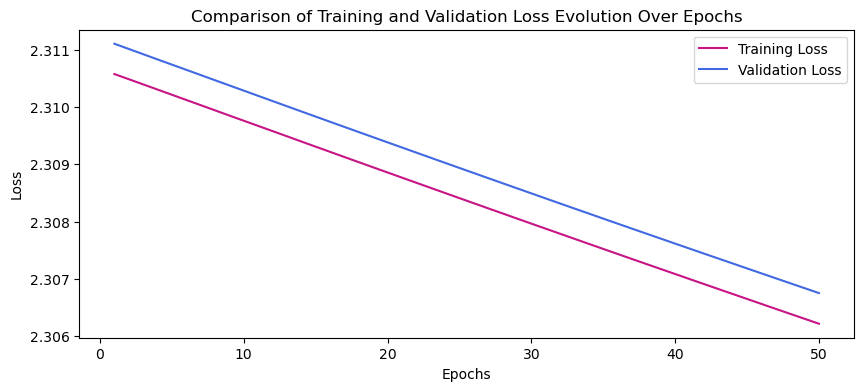

In [19]:
# num_epochs = 50, lr = 0.01, four hidden layers, l2 = 0, batch_size = len(train_subset):  
model_bgdX1 = CustomNeuralNetworkX()
loss_train, loss_val_list = model_gd(50, 0.01, model_bgdX1, 0, len(train_subset))
visualize_loss(loss_train, loss_val_list)

Epoch: 0 | Loss: 2.31295, Acc: 9.95% | Validation Loss: 2.31198, Validation Acc: 9.97%
Epoch: 10 | Loss: 2.30577, Acc: 12.80% | Validation Loss: 2.30508, Validation Acc: 13.05%
Epoch: 20 | Loss: 2.29952, Acc: 14.44% | Validation Loss: 2.29891, Validation Acc: 14.72%
Epoch: 30 | Loss: 2.29277, Acc: 18.70% | Validation Loss: 2.29208, Validation Acc: 18.55%
Epoch: 40 | Loss: 2.28375, Acc: 22.35% | Validation Loss: 2.28288, Validation Acc: 22.17%
Epoch: 49 | Loss: 2.27268, Acc: 24.11% | Validation Loss: 2.27154, Validation Acc: 23.88%


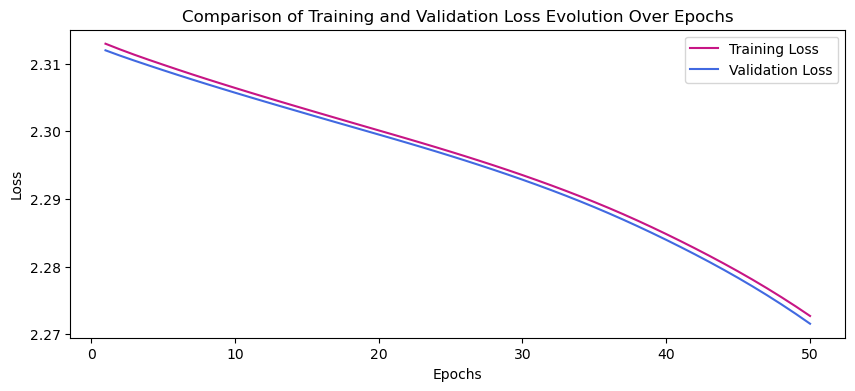

In [20]:
# num_epochs = 50, lr = 0.1, four hidden layers, l2 = 0, batch_size = len(train_subset):  
model_gdX2 = CustomNeuralNetworkX()
loss_train, loss_val_list = model_gd(50, 0.1, model_gdX2, 0, len(train_subset))
visualize_loss(loss_train, loss_val_list)

Epoch: 0 | Loss: 2.30701, Acc: 10.77% | Validation Loss: 2.30739, Validation Acc: 10.66%
Epoch: 10 | Loss: 2.30304, Acc: 12.61% | Validation Loss: 2.30343, Validation Acc: 12.24%
Epoch: 20 | Loss: 2.29896, Acc: 15.08% | Validation Loss: 2.29938, Validation Acc: 14.99%
Epoch: 30 | Loss: 2.29506, Acc: 16.83% | Validation Loss: 2.29553, Validation Acc: 16.82%
Epoch: 40 | Loss: 2.29138, Acc: 17.88% | Validation Loss: 2.29188, Validation Acc: 17.66%
Epoch: 50 | Loss: 2.28776, Acc: 18.95% | Validation Loss: 2.28826, Validation Acc: 18.72%
Epoch: 60 | Loss: 2.28400, Acc: 20.74% | Validation Loss: 2.28447, Validation Acc: 20.61%
Epoch: 70 | Loss: 2.28000, Acc: 23.13% | Validation Loss: 2.28045, Validation Acc: 22.88%
Epoch: 80 | Loss: 2.27581, Acc: 25.46% | Validation Loss: 2.27623, Validation Acc: 25.06%
Epoch: 90 | Loss: 2.27143, Acc: 27.30% | Validation Loss: 2.27185, Validation Acc: 27.05%
Epoch: 99 | Loss: 2.26733, Acc: 28.55% | Validation Loss: 2.26773, Validation Acc: 28.39%


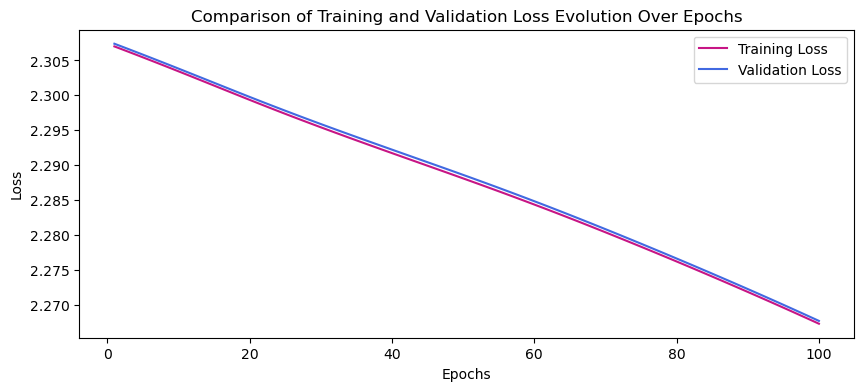

In [23]:
# num_epochs = 100, lr = 0.01, three hidden layers, l2 = 0, batch_size = len(train_subset):  
model_gd1 = CustomNeuralNetworkA()
loss_train, loss_val_list = model_gd(100, 0.01, model_gd1, 0, len(train_subset))
visualize_loss(loss_train, loss_val_list)

Epoch: 0 | Loss: 2.30824, Acc: 8.97% | Validation Loss: 2.30487, Validation Acc: 9.26%
Epoch: 10 | Loss: 2.26978, Acc: 11.75% | Validation Loss: 2.26498, Validation Acc: 11.72%
Epoch: 20 | Loss: 2.20867, Acc: 19.92% | Validation Loss: 2.19996, Validation Acc: 19.84%
Epoch: 30 | Loss: 2.10329, Acc: 37.82% | Validation Loss: 2.08938, Validation Acc: 37.67%
Epoch: 40 | Loss: 1.93327, Acc: 49.51% | Validation Loss: 1.91123, Validation Acc: 49.19%
Epoch: 50 | Loss: 1.84095, Acc: 20.76% | Validation Loss: 2.13007, Validation Acc: 20.72%
Early stopping at epoch 59,with 1.67886 validation loss


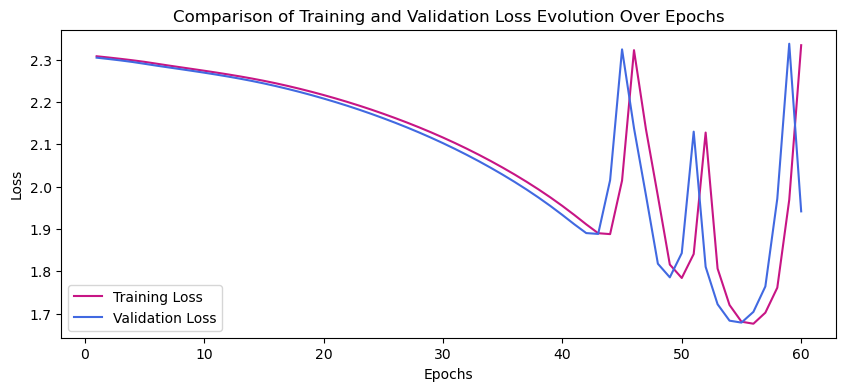

In [24]:
# num_epochs = 100, lr = 0.1, three hidden layers, l2 = 0, batch_size = len(train_subset):  
model_gd2 = CustomNeuralNetworkA()
loss_train, loss_val_list = model_gd(100, 0.1, model_gd2, 0, len(train_subset))
visualize_loss(loss_train, loss_val_list)

Epoch: 0 | Loss: 2.31878, Acc: 12.24% | Validation Loss: 2.29474, Validation Acc: 12.12%
Epoch: 10 | Loss: 2.08258, Acc: 56.20% | Validation Loss: 2.05148, Validation Acc: 55.99%
Epoch: 20 | Loss: 1.61012, Acc: 67.74% | Validation Loss: 1.55268, Validation Acc: 67.56%
Epoch: 30 | Loss: 2.60002, Acc: 52.61% | Validation Loss: 1.73080, Validation Acc: 52.73%
Early stopping at epoch 31,with 1.22599 validation loss


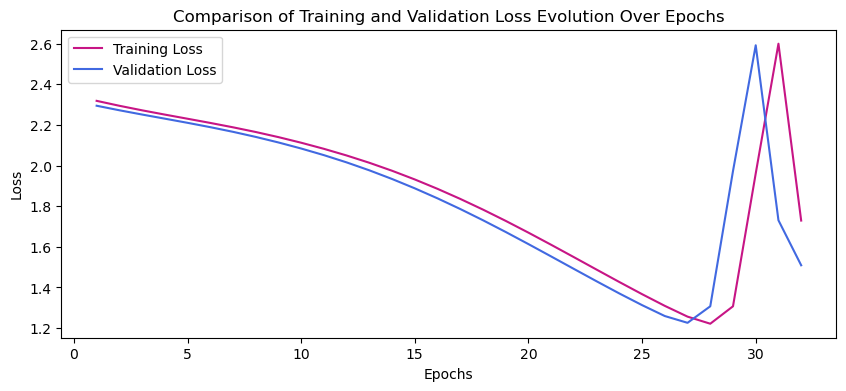

In [25]:
# num_epochs = 100, lr = 0.1, two hidden layers, l2 = 0, batch_size = len(train_subset):  
model_gd3 = CustomNeuralNetworkB()
loss_train, loss_val_list = model_gd(100, 0.1, model_gd3, 0, len(train_subset))
visualize_loss(loss_train, loss_val_list)

#### model_bgd_dropout:

Epoch: 0 | Loss: 2.31409, Acc: 9.79% | Validation Loss: 2.31496, Validation Acc: 9.51%
Epoch: 10 | Loss: 2.31326, Acc: 9.79% | Validation Loss: 2.31409, Validation Acc: 9.51%
Epoch: 20 | Loss: 2.31230, Acc: 9.79% | Validation Loss: 2.31323, Validation Acc: 9.51%
Epoch: 30 | Loss: 2.31156, Acc: 9.79% | Validation Loss: 2.31240, Validation Acc: 9.51%
Epoch: 40 | Loss: 2.31076, Acc: 9.79% | Validation Loss: 2.31159, Validation Acc: 9.51%
Epoch: 50 | Loss: 2.30994, Acc: 9.79% | Validation Loss: 2.31079, Validation Acc: 9.51%
Epoch: 60 | Loss: 2.30951, Acc: 9.79% | Validation Loss: 2.31002, Validation Acc: 9.51%
Epoch: 70 | Loss: 2.30892, Acc: 9.79% | Validation Loss: 2.30925, Validation Acc: 9.51%
Epoch: 80 | Loss: 2.30817, Acc: 9.79% | Validation Loss: 2.30850, Validation Acc: 9.51%
Epoch: 90 | Loss: 2.30751, Acc: 9.79% | Validation Loss: 2.30777, Validation Acc: 9.51%
Epoch: 99 | Loss: 2.30686, Acc: 9.79% | Validation Loss: 2.30714, Validation Acc: 9.51%


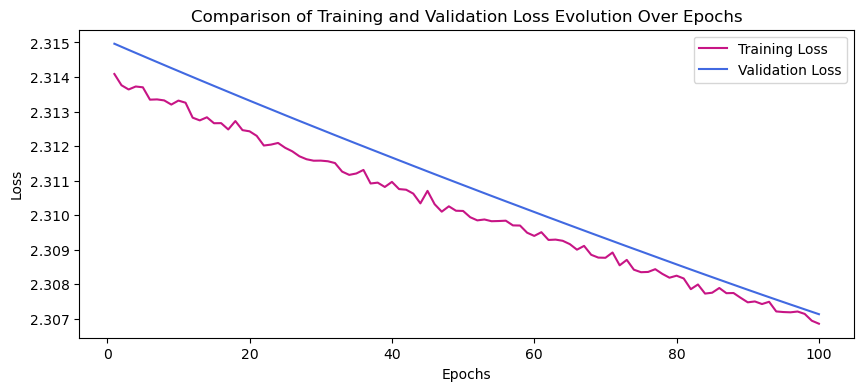

In [26]:
# num_epochs = 100, lr = 0.01, four hidden layers with Dropout, dropout = 0.2, l2 = 0, batch_size = len(train_subset):  
model_bgd_drop4 = CustomNeuralNetworkDropout4(0.2)
loss_train, loss_val_list = model_gd(100, 0.01, model_bgd_drop4, 0, len(train_subset))
visualize_loss(loss_train, loss_val_list)

Epoch: 0 | Loss: 2.30614, Acc: 9.89% | Validation Loss: 2.30525, Validation Acc: 9.82%
Epoch: 10 | Loss: 2.30128, Acc: 10.83% | Validation Loss: 2.29981, Validation Acc: 10.86%
Epoch: 20 | Loss: 2.29698, Acc: 12.44% | Validation Loss: 2.29462, Validation Acc: 12.43%
Epoch: 30 | Loss: 2.29165, Acc: 14.55% | Validation Loss: 2.28845, Validation Acc: 14.48%
Epoch: 40 | Loss: 2.28495, Acc: 28.50% | Validation Loss: 2.27996, Validation Acc: 28.43%
Epoch: 50 | Loss: 2.27525, Acc: 30.66% | Validation Loss: 2.26758, Validation Acc: 30.51%
Epoch: 60 | Loss: 2.25982, Acc: 32.90% | Validation Loss: 2.24837, Validation Acc: 32.77%
Epoch: 70 | Loss: 2.23250, Acc: 34.65% | Validation Loss: 2.21493, Validation Acc: 34.45%
Epoch: 80 | Loss: 2.17979, Acc: 32.85% | Validation Loss: 2.14808, Validation Acc: 32.29%
Epoch: 90 | Loss: 2.07177, Acc: 32.56% | Validation Loss: 2.01385, Validation Acc: 32.13%
Epoch: 99 | Loss: 1.98504, Acc: 29.20% | Validation Loss: 2.05879, Validation Acc: 28.71%


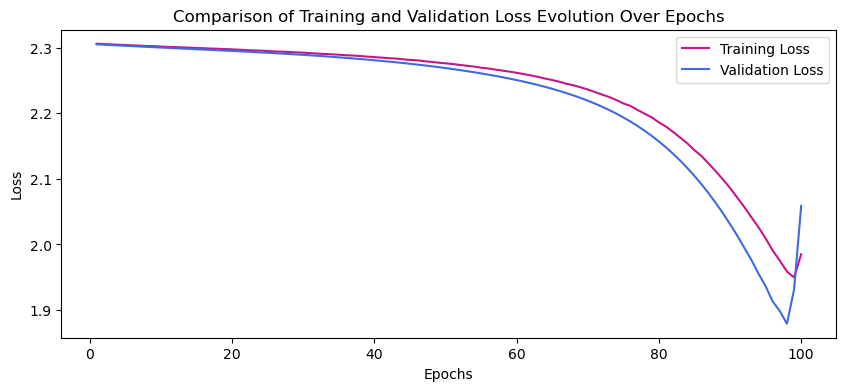

In [27]:
# num_epochs = 100, lr = 0.1, four hidden layers with Dropout, dropout = 0.2, l2 = 0, batch_size = len(train_subset):  
model_bgd_drop4 = CustomNeuralNetworkDropout4(0.2)
loss_train, loss_val_list = model_gd(100, 0.1, model_bgd_drop4, 0, len(train_subset))
visualize_loss(loss_train, loss_val_list)

Epoch: 0 | Loss: 2.31079, Acc: 10.20% | Validation Loss: 2.30463, Validation Acc: 10.13%
Epoch: 10 | Loss: 2.29202, Acc: 14.05% | Validation Loss: 2.28567, Validation Acc: 13.78%
Epoch: 20 | Loss: 2.27702, Acc: 16.26% | Validation Loss: 2.26904, Validation Acc: 15.88%
Epoch: 30 | Loss: 2.26095, Acc: 17.41% | Validation Loss: 2.25256, Validation Acc: 17.18%
Epoch: 40 | Loss: 2.24570, Acc: 20.99% | Validation Loss: 2.23567, Validation Acc: 20.83%
Epoch: 50 | Loss: 2.22969, Acc: 27.12% | Validation Loss: 2.21810, Validation Acc: 27.18%
Epoch: 60 | Loss: 2.21210, Acc: 29.67% | Validation Loss: 2.19958, Validation Acc: 29.78%
Epoch: 70 | Loss: 2.19417, Acc: 31.58% | Validation Loss: 2.17963, Validation Acc: 31.51%
Epoch: 80 | Loss: 2.17354, Acc: 33.10% | Validation Loss: 2.15763, Validation Acc: 33.02%
Epoch: 90 | Loss: 2.15182, Acc: 34.99% | Validation Loss: 2.13303, Validation Acc: 34.85%
Epoch: 99 | Loss: 2.12834, Acc: 36.79% | Validation Loss: 2.10833, Validation Acc: 36.79%


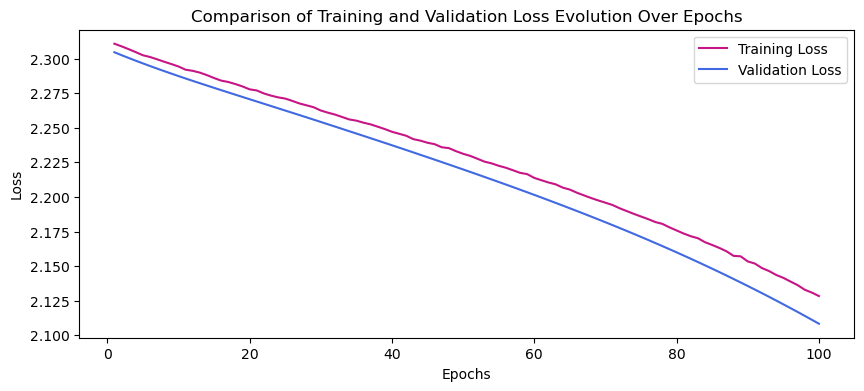

In [28]:
# num_epochs = 100, lr = 0.01, two hidden layers with Dropout, dropout = 0.2, l2 = 0, batch_size = len(train_subset):  
model_bgd_drop2 = CustomNeuralNetworkDropout2(0.2)
loss_train, loss_val_list = model_gd(100, 0.01, model_bgd_drop2, 0, len(train_subset))
visualize_loss(loss_train, loss_val_list)

Epoch: 0 | Loss: 2.30597, Acc: 10.44% | Validation Loss: 2.28853, Validation Acc: 10.32%
Epoch: 10 | Loss: 2.16431, Acc: 41.62% | Validation Loss: 2.12920, Validation Acc: 42.06%
Epoch: 20 | Loss: 1.88647, Acc: 56.31% | Validation Loss: 1.80781, Validation Acc: 56.31%
Epoch: 30 | Loss: 2.03443, Acc: 58.59% | Validation Loss: 1.63687, Validation Acc: 57.97%
Epoch: 40 | Loss: 1.51309, Acc: 46.77% | Validation Loss: 1.54875, Validation Acc: 47.12%
Early stopping at epoch 41,with 1.25147 validation loss


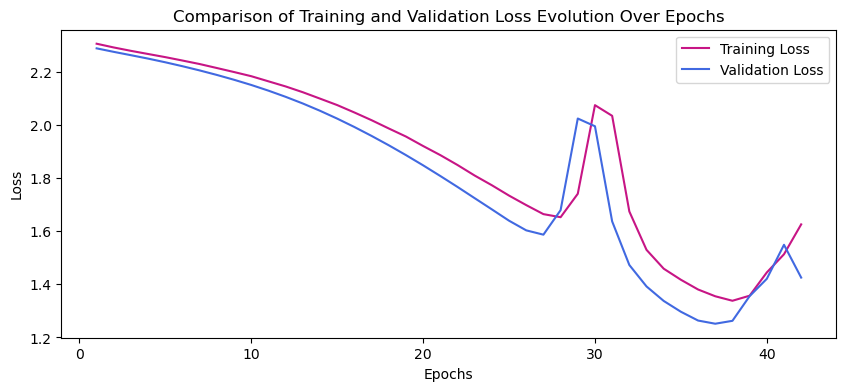

In [29]:
# num_epochs = 100, lr = 0.1, two hidden layers with Dropout, dropout = 0.2, l2 = 0, batch_size = len(train_subset):  
model_bgd_drop2 = CustomNeuralNetworkDropout2(0.2)
loss_train, loss_val_list = model_gd(100, 0.1, model_bgd_drop2, 0, len(train_subset))
visualize_loss(loss_train, loss_val_list)

#### model_bgd_l2:

Epoch: 0 | Loss: 2.30856, Acc: 9.97% | Validation Loss: 2.30538, Validation Acc: 10.07%
Epoch: 10 | Loss: 2.28331, Acc: 11.71% | Validation Loss: 2.28076, Validation Acc: 11.68%
Epoch: 20 | Loss: 2.26131, Acc: 24.90% | Validation Loss: 2.25909, Validation Acc: 24.51%
Epoch: 30 | Loss: 2.24063, Acc: 27.74% | Validation Loss: 2.23860, Validation Acc: 27.47%
Epoch: 40 | Loss: 2.21996, Acc: 31.25% | Validation Loss: 2.21801, Validation Acc: 31.19%
Epoch: 50 | Loss: 2.19840, Acc: 36.31% | Validation Loss: 2.19650, Validation Acc: 35.85%
Epoch: 60 | Loss: 2.17576, Acc: 41.52% | Validation Loss: 2.17389, Validation Acc: 41.08%
Epoch: 70 | Loss: 2.15173, Acc: 45.75% | Validation Loss: 2.14981, Validation Acc: 45.34%
Epoch: 80 | Loss: 2.12594, Acc: 49.21% | Validation Loss: 2.12394, Validation Acc: 48.98%
Epoch: 90 | Loss: 2.09812, Acc: 52.18% | Validation Loss: 2.09599, Validation Acc: 52.09%
Epoch: 99 | Loss: 2.07115, Acc: 54.71% | Validation Loss: 2.06888, Validation Acc: 54.23%


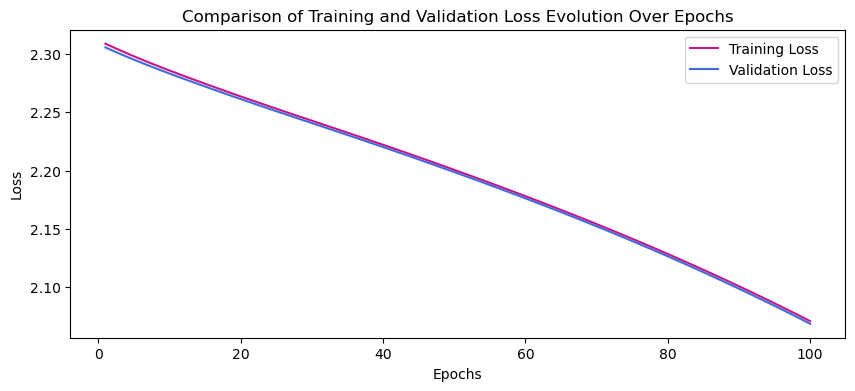

In [30]:
# num_epochs = 100, lr = 0.01, two hidden layers, l2 = 0.001, batch_size = len(train_subset):  
model_gd4 = CustomNeuralNetworkB()
loss_train, loss_val_list = model_gd(100, 0.01, model_gd4, 0.001, len(train_subset))
visualize_loss(loss_train, loss_val_list)

Epoch: 0 | Loss: 2.30983, Acc: 8.99% | Validation Loss: 2.30774, Validation Acc: 9.13%
Epoch: 10 | Loss: 2.28711, Acc: 15.16% | Validation Loss: 2.28541, Validation Acc: 15.06%
Epoch: 20 | Loss: 2.26649, Acc: 18.14% | Validation Loss: 2.26502, Validation Acc: 17.93%
Epoch: 30 | Loss: 2.24714, Acc: 21.79% | Validation Loss: 2.24577, Validation Acc: 21.42%
Epoch: 40 | Loss: 2.22801, Acc: 26.36% | Validation Loss: 2.22668, Validation Acc: 25.67%
Epoch: 50 | Loss: 2.20827, Acc: 30.97% | Validation Loss: 2.20692, Validation Acc: 30.53%
Epoch: 60 | Loss: 2.18735, Acc: 35.20% | Validation Loss: 2.18594, Validation Acc: 34.51%
Epoch: 70 | Loss: 2.16483, Acc: 38.96% | Validation Loss: 2.16333, Validation Acc: 38.52%
Epoch: 80 | Loss: 2.14050, Acc: 42.71% | Validation Loss: 2.13891, Validation Acc: 42.48%
Epoch: 90 | Loss: 2.11409, Acc: 46.24% | Validation Loss: 2.11241, Validation Acc: 46.46%
Epoch: 99 | Loss: 2.08824, Acc: 49.14% | Validation Loss: 2.08649, Validation Acc: 49.26%


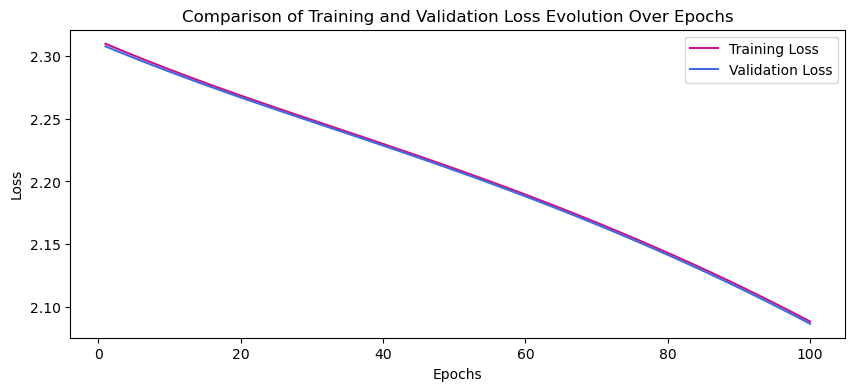

In [31]:
# num_epochs = 100, lr = 0.01, two hidden layers, l2 = 0.01, batch_size = len(train_subset):  
model_gd5 = CustomNeuralNetworkB()
loss_train, loss_val_list = model_gd(100, 0.01, model_gd5, 0.01, len(train_subset))
visualize_loss(loss_train, loss_val_list)

Epoch: 0 | Loss: 2.30850, Acc: 9.89% | Validation Loss: 2.30603, Validation Acc: 9.84%
Epoch: 10 | Loss: 2.28484, Acc: 10.48% | Validation Loss: 2.28282, Validation Acc: 10.57%
Epoch: 20 | Loss: 2.26399, Acc: 22.39% | Validation Loss: 2.26227, Validation Acc: 22.51%
Epoch: 30 | Loss: 2.24505, Acc: 33.88% | Validation Loss: 2.24361, Validation Acc: 34.00%
Epoch: 40 | Loss: 2.22721, Acc: 37.73% | Validation Loss: 2.22595, Validation Acc: 37.45%
Epoch: 50 | Loss: 2.20994, Acc: 39.74% | Validation Loss: 2.20881, Validation Acc: 39.52%
Epoch: 60 | Loss: 2.19298, Acc: 41.67% | Validation Loss: 2.19195, Validation Acc: 41.42%
Epoch: 70 | Loss: 2.17608, Acc: 43.88% | Validation Loss: 2.17511, Validation Acc: 43.38%
Epoch: 80 | Loss: 2.15895, Acc: 45.79% | Validation Loss: 2.15804, Validation Acc: 45.27%
Epoch: 90 | Loss: 2.14138, Acc: 47.62% | Validation Loss: 2.14050, Validation Acc: 47.21%
Epoch: 99 | Loss: 2.12503, Acc: 49.01% | Validation Loss: 2.12415, Validation Acc: 48.62%


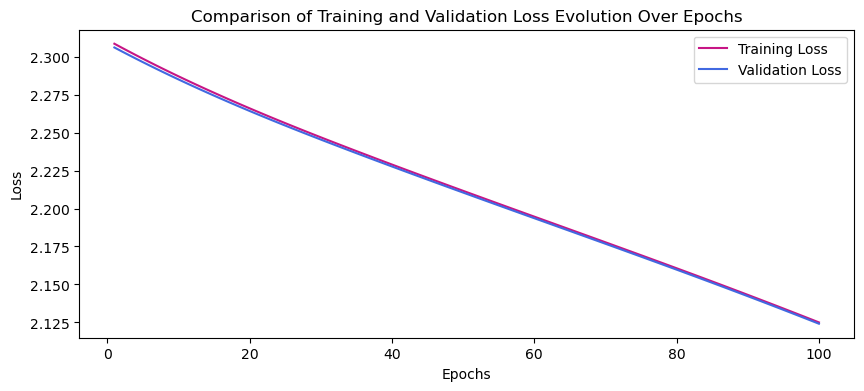

In [32]:
# num_epochs = 100, lr = 0.01, two hidden layers, l2 = 0.1, batch_size = len(train_subset):  
model_gd6 = CustomNeuralNetworkB()
loss_train, loss_val_list = model_gd(100, 0.01, model_gd6, 0.1, len(train_subset))
visualize_loss(loss_train, loss_val_list)

Epoch: 0 | Loss: 2.30077, Acc: 15.44% | Validation Loss: 2.28124, Validation Acc: 15.23%
Epoch: 10 | Loss: 2.09295, Acc: 46.46% | Validation Loss: 2.06548, Validation Acc: 46.10%
Epoch: 20 | Loss: 1.67769, Acc: 63.65% | Validation Loss: 1.62749, Validation Acc: 63.06%
Epoch: 30 | Loss: 2.29799, Acc: 46.27% | Validation Loss: 1.77318, Validation Acc: 45.75%
Early stopping at epoch 31,with 1.32321 validation loss


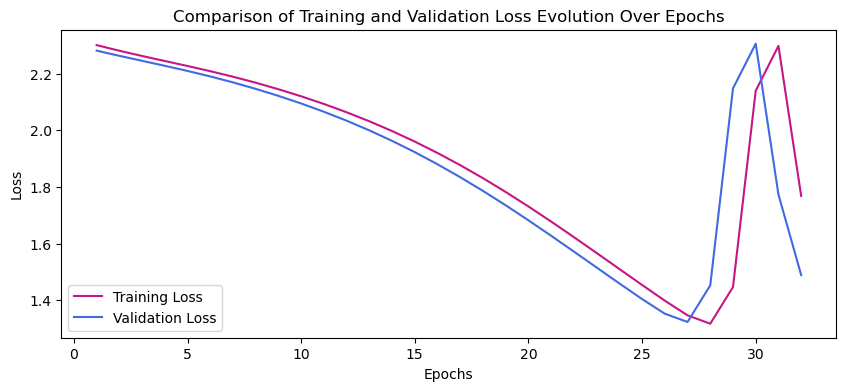

In [33]:
# num_epochs = 100, lr = 0.1, two hidden layers, l2 = 0.001, batch_size = len(train_subset):  
model_gd7 = CustomNeuralNetworkB()
loss_train, loss_val_list = model_gd(100, 0.1, model_gd7, 0.001, len(train_subset))
visualize_loss(loss_train, loss_val_list)

Epoch: 0 | Loss: 2.30827, Acc: 16.49% | Validation Loss: 2.28814, Validation Acc: 16.22%
Epoch: 10 | Loss: 2.10004, Acc: 54.81% | Validation Loss: 2.07034, Validation Acc: 54.40%
Epoch: 20 | Loss: 1.66302, Acc: 67.60% | Validation Loss: 1.60927, Validation Acc: 66.86%
Epoch: 30 | Loss: 1.12577, Acc: 73.35% | Validation Loss: 1.11002, Validation Acc: 72.54%
Early stopping at epoch 35,with 1.11002 validation loss


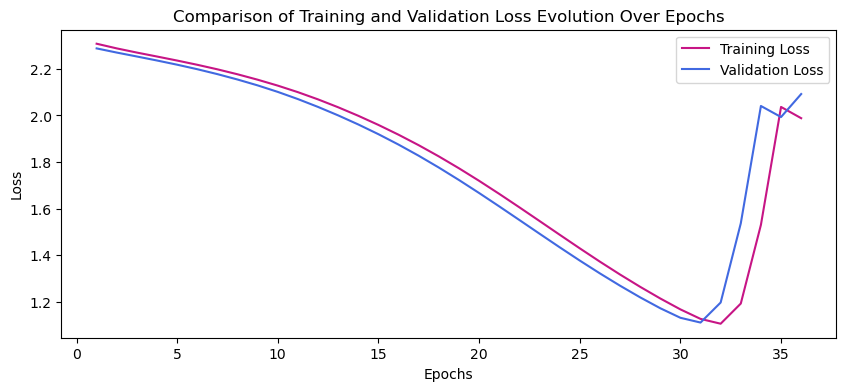

In [34]:
# num_epochs = 100, lr = 0.1, two hidden layers, l2 = 0.01, batch_size = len(train_subset):  
model_gd8 = CustomNeuralNetworkB()
loss_train, loss_val_list = model_gd(100, 0.1, model_gd8, 0.01, len(train_subset))
visualize_loss(loss_train, loss_val_list)

Epoch: 0 | Loss: 2.30826, Acc: 12.92% | Validation Loss: 2.28472, Validation Acc: 12.61%
Epoch: 10 | Loss: 2.13051, Acc: 62.22% | Validation Loss: 2.11162, Validation Acc: 61.85%
Epoch: 20 | Loss: 1.87825, Acc: 65.29% | Validation Loss: 1.84861, Validation Acc: 64.97%
Epoch: 30 | Loss: 1.51331, Acc: 69.16% | Validation Loss: 1.48164, Validation Acc: 68.59%
Epoch: 40 | Loss: 2.06953, Acc: 54.26% | Validation Loss: 1.47219, Validation Acc: 54.07%
Early stopping at epoch 41,with 1.31556 validation loss


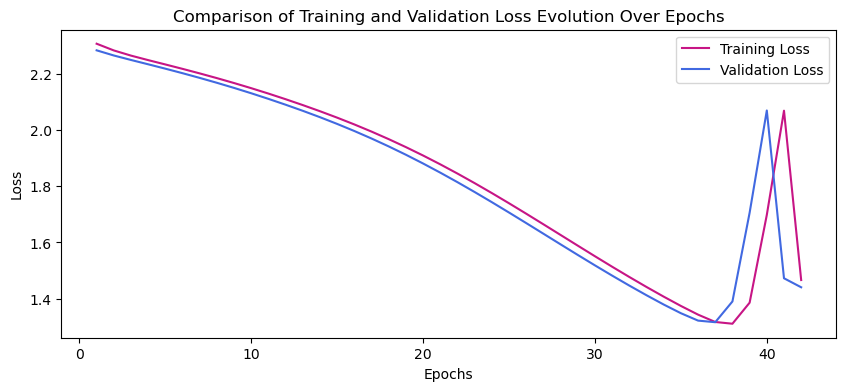

In [35]:
# num_epochs = 100, lr = 0.1, two hidden layers, l2 = 0.1, batch_size = len(train_subset):  
model_gd9 = CustomNeuralNetworkB()
loss_train, loss_val_list = model_gd(100, 0.1, model_gd9, 0.1, len(train_subset))
visualize_loss(loss_train, loss_val_list)

## MBGD - Mini Batch Gradient Descent:

#### Utilizing varied hyperparameters for the model_mb:

#### model_mb:

Epoch: 0 | Loss: 2.30356, Acc: 25.78% | Validation Loss: 2.28881, Validation Acc: 19.53%
Epoch: 10 | Loss: 0.51008, Acc: 85.16% | Validation Loss: 0.48235, Validation Acc: 86.07%
Epoch: 20 | Loss: 0.29630, Acc: 89.84% | Validation Loss: 0.29914, Validation Acc: 91.33%
Epoch: 30 | Loss: 0.21558, Acc: 92.97% | Validation Loss: 0.25308, Validation Acc: 92.71%
Epoch: 40 | Loss: 0.15717, Acc: 93.75% | Validation Loss: 0.18000, Validation Acc: 94.77%
Epoch: 49 | Loss: 0.12209, Acc: 95.31% | Validation Loss: 0.14503, Validation Acc: 95.74%


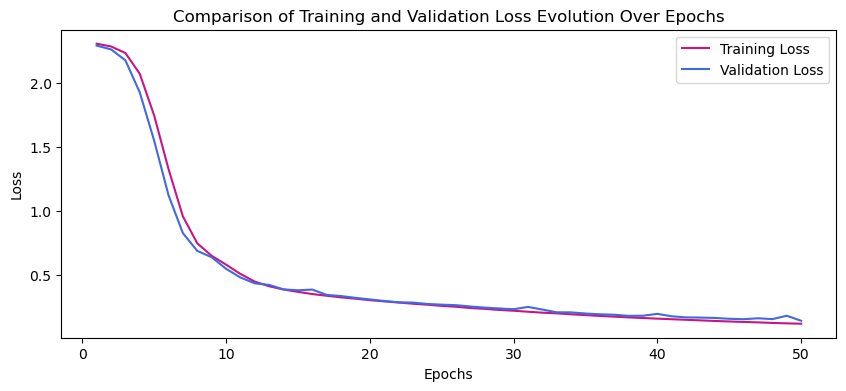

In [36]:
# num_epochs = 50, lr = 0.01, four hidden layers, l2 = 0, batch_size = 256:  
model_mbX1 = CustomNeuralNetworkX()
loss_train, loss_val_list = model_gd(50, 0.01, model_mbX1, 0, 256)
visualize_loss(loss_train, loss_val_list)

Epoch: 0 | Loss: 2.29515, Acc: 35.94% | Validation Loss: 2.28238, Validation Acc: 31.24%
Epoch: 10 | Loss: 0.29058, Acc: 94.53% | Validation Loss: 0.29950, Validation Acc: 91.09%
Epoch: 20 | Loss: 0.15823, Acc: 97.66% | Validation Loss: 0.17302, Validation Acc: 94.88%
Epoch: 30 | Loss: 0.09827, Acc: 94.53% | Validation Loss: 0.14458, Validation Acc: 95.72%
Epoch: 40 | Loss: 0.06488, Acc: 96.88% | Validation Loss: 0.12140, Validation Acc: 96.54%
Epoch: 49 | Loss: 0.04572, Acc: 98.44% | Validation Loss: 0.10494, Validation Acc: 96.92%


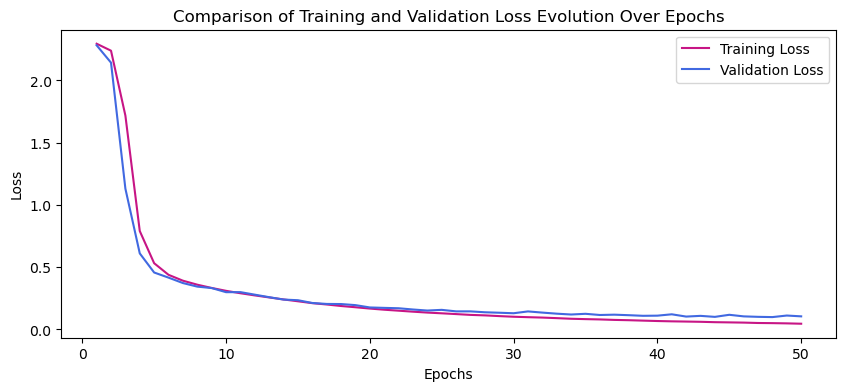

In [37]:
# num_epochs = 50, lr = 0.01, four hidden layers, l2 = 0, batch_size = 128:    
model_mbX2 = CustomNeuralNetworkX()
loss_train, loss_val_list = model_gd(50, 0.01, model_mbX2, 0, 128)
visualize_loss(loss_train, loss_val_list)

Epoch: 0 | Loss: 2.27335, Acc: 18.75% | Validation Loss: 2.18059, Validation Acc: 18.95%
Epoch: 10 | Loss: 0.16000, Acc: 96.88% | Validation Loss: 0.17153, Validation Acc: 95.03%
Epoch: 20 | Loss: 0.07197, Acc: 93.75% | Validation Loss: 0.11903, Validation Acc: 96.45%
Epoch: 30 | Loss: 0.03726, Acc: 100.00% | Validation Loss: 0.09383, Validation Acc: 97.32%
Epoch: 40 | Loss: 0.01667, Acc: 100.00% | Validation Loss: 0.09802, Validation Acc: 97.48%
Early stopping at epoch 44,with 0.09169 validation loss


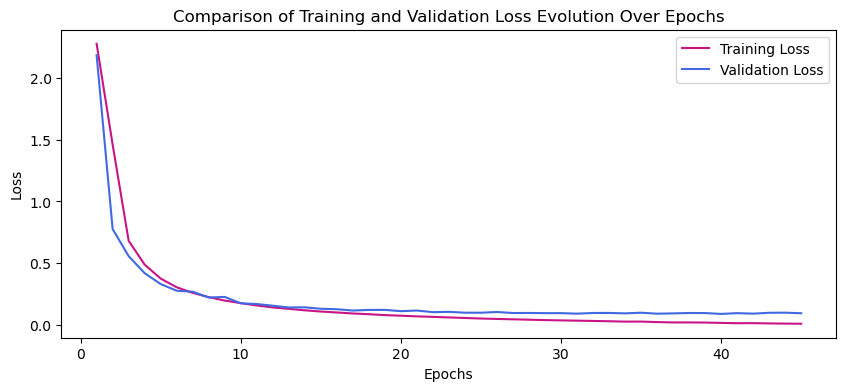

In [38]:
# num_epochs = 50, lr = 0.01, four hidden layers, l2 = 0, batch_size = 64:
model_mbX2 = CustomNeuralNetworkX()
loss_train, loss_val_list = model_gd(50, 0.01, model_mbX2, 0, 64)
visualize_loss(loss_train, loss_val_list)

Epoch: 0 | Loss: 1.72759, Acc: 78.12% | Validation Loss: 0.64485, Validation Acc: 80.53%
Epoch: 10 | Loss: 0.08077, Acc: 96.88% | Validation Loss: 0.10913, Validation Acc: 96.67%
Epoch: 20 | Loss: 0.03065, Acc: 100.00% | Validation Loss: 0.09073, Validation Acc: 97.54%
Early stopping at epoch 21,with 0.08964 validation loss


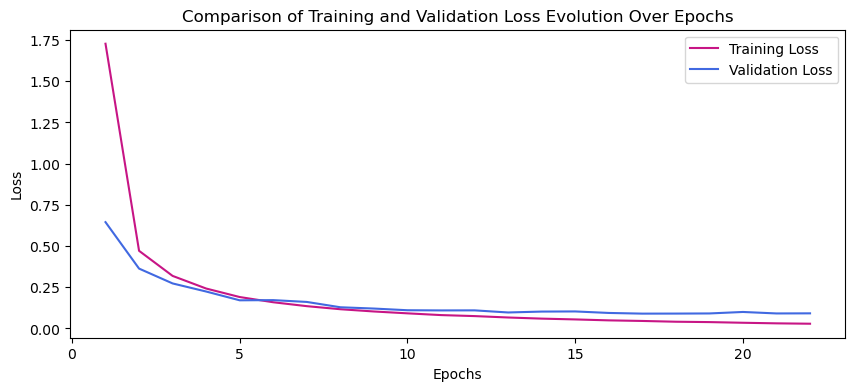

In [39]:
# num_epochs = 50, lr = 0.01, four hidden layers, l2 = 0, batch_size = 32:  
model_mbX2 = CustomNeuralNetworkX()
loss_train, loss_val_list = model_gd(50, 0.01, model_mbX2, 0, 32)
visualize_loss(loss_train, loss_val_list)

Epoch: 0 | Loss: 1.76201, Acc: 56.25% | Validation Loss: 1.44551, Validation Acc: 52.71%
Epoch: 10 | Loss: 0.10795, Acc: 97.66% | Validation Loss: 0.13164, Validation Acc: 96.02%
Early stopping at epoch 19,with 0.09190 validation loss


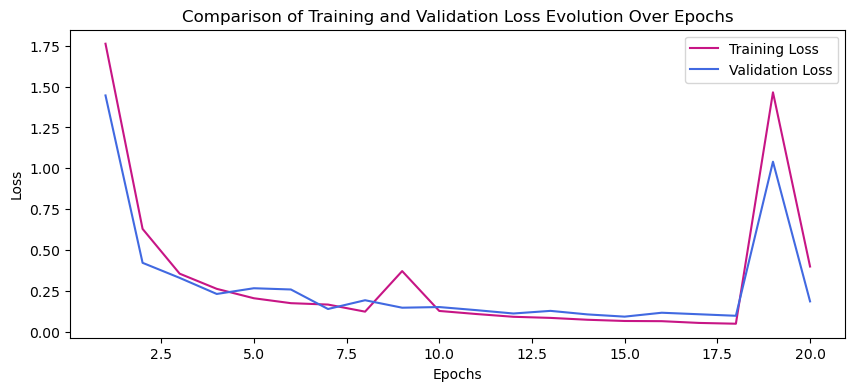

In [40]:
# num_epochs = 50, lr = 0.1, four hidden layers, l2 = 0, batch_size = 256:  
model_mbX3 = CustomNeuralNetworkX()
loss_train, loss_val_list = model_gd(50, 0.1, model_mbX3, 0, 256)
visualize_loss(loss_train, loss_val_list)

Epoch: 0 | Loss: 1.28159, Acc: 73.44% | Validation Loss: 0.91648, Validation Acc: 70.42%
Epoch: 10 | Loss: 0.05600, Acc: 99.22% | Validation Loss: 0.09422, Validation Acc: 97.35%
Early stopping at epoch 19,with 0.08644 validation loss


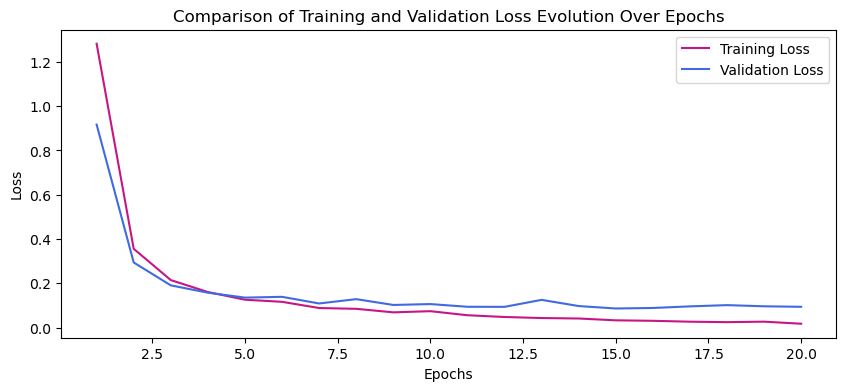

In [41]:
# num_epochs = 50, lr = 0.1, four hidden layers, l2 = 0, batch_size = 128:  
model_mbX4 = CustomNeuralNetworkX()
loss_train, loss_val_list = model_gd(50, 0.1, model_mbX4, 0, 128)
visualize_loss(loss_train, loss_val_list)

Epoch: 0 | Loss: 0.85640, Acc: 90.62% | Validation Loss: 0.31466, Validation Acc: 90.11%
Epoch: 10 | Loss: 0.04311, Acc: 98.44% | Validation Loss: 0.07938, Validation Acc: 97.79%
Early stopping at epoch 15,with 0.07938 validation loss


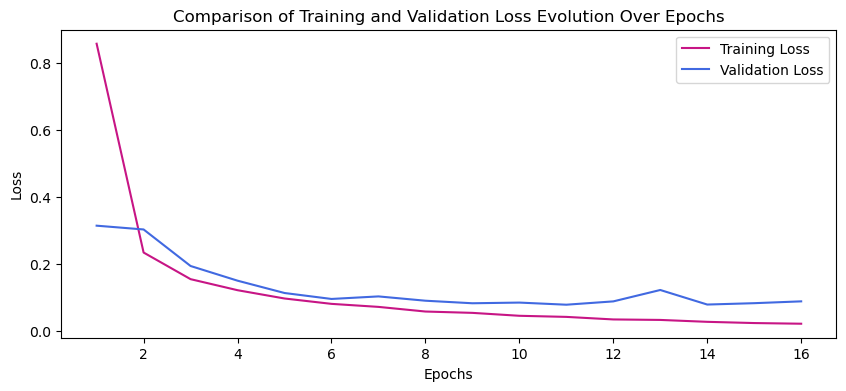

In [42]:
# num_epochs = 50, lr = 0.1, four hidden layers, l2 = 0, batch_size = 64: 
model_mbX4 = CustomNeuralNetworkX()
loss_train, loss_val_list = model_gd(50, 0.1, model_mbX4, 0, 64)
visualize_loss(loss_train, loss_val_list)

Epoch: 0 | Loss: 0.64717, Acc: 87.50% | Validation Loss: 0.33734, Validation Acc: 89.23%
Epoch: 10 | Loss: 0.04570, Acc: 100.00% | Validation Loss: 0.09143, Validation Acc: 97.48%
Early stopping at epoch 18,with 0.07968 validation loss


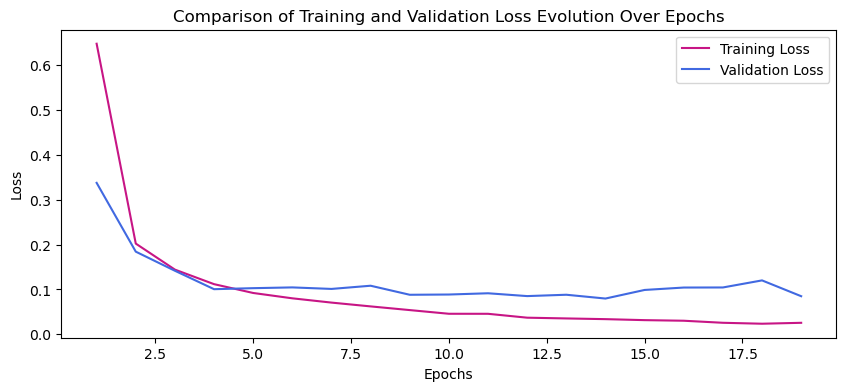

In [43]:
# num_epochs = 50, lr = 0.1, four hidden layers, l2 = 0, batch_size = 32: 
model_mbX4 = CustomNeuralNetworkX()
loss_train, loss_val_list = model_gd(50, 0.1, model_mbX4, 0, 32)
visualize_loss(loss_train, loss_val_list)

Epoch: 0 | Loss: 1.70056, Acc: 67.19% | Validation Loss: 0.89506, Validation Acc: 72.16%
Epoch: 10 | Loss: 0.17201, Acc: 96.88% | Validation Loss: 0.17782, Validation Acc: 94.72%
Epoch: 20 | Loss: 0.09431, Acc: 100.00% | Validation Loss: 0.12788, Validation Acc: 96.14%
Epoch: 30 | Loss: 0.05790, Acc: 98.44% | Validation Loss: 0.09865, Validation Acc: 97.08%
Epoch: 40 | Loss: 0.03711, Acc: 100.00% | Validation Loss: 0.09567, Validation Acc: 97.12%
Early stopping at epoch 47,with 0.09461 validation loss


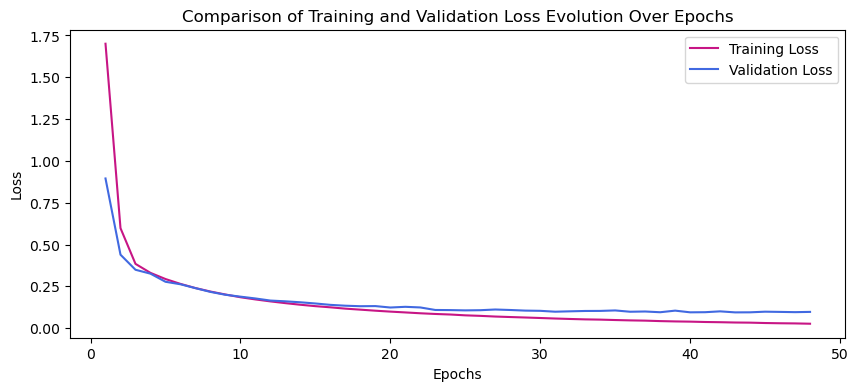

In [44]:
# num_epochs = 50, lr = 0.01, three hidden layers, l2 = 0, batch_size = 64:
model_mb1 = CustomNeuralNetworkA()
loss_train, loss_val_list = model_gd(50, 0.01, model_mb1, 0, 64)
visualize_loss(loss_train, loss_val_list)

Epoch: 0 | Loss: 0.52537, Acc: 96.88% | Validation Loss: 0.34575, Validation Acc: 87.96%
Epoch: 10 | Loss: 0.05132, Acc: 93.75% | Validation Loss: 0.09436, Validation Acc: 97.30%
Early stopping at epoch 16,with 0.09159 validation loss


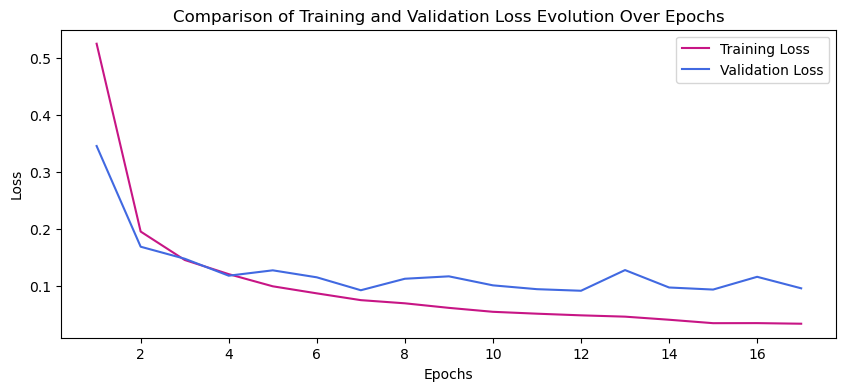

In [45]:
# num_epochs = 50, lr = 0.1, three hidden layers, l2 = 0, batch_size = 32:  
model_mb1 = CustomNeuralNetworkA()
loss_train, loss_val_list = model_gd(50, 0.1, model_mb1, 0, 32)
visualize_loss(loss_train, loss_val_list)

#### model_mb_dropout:

Epoch: 0 | Loss: 2.30127, Acc: 14.06% | Validation Loss: 2.28587, Validation Acc: 15.04%
Epoch: 10 | Loss: 0.51911, Acc: 93.75% | Validation Loss: 0.36010, Validation Acc: 89.89%
Epoch: 20 | Loss: 0.27215, Acc: 96.88% | Validation Loss: 0.18404, Validation Acc: 94.87%
Epoch: 29 | Loss: 0.18839, Acc: 97.66% | Validation Loss: 0.13912, Validation Acc: 96.24%


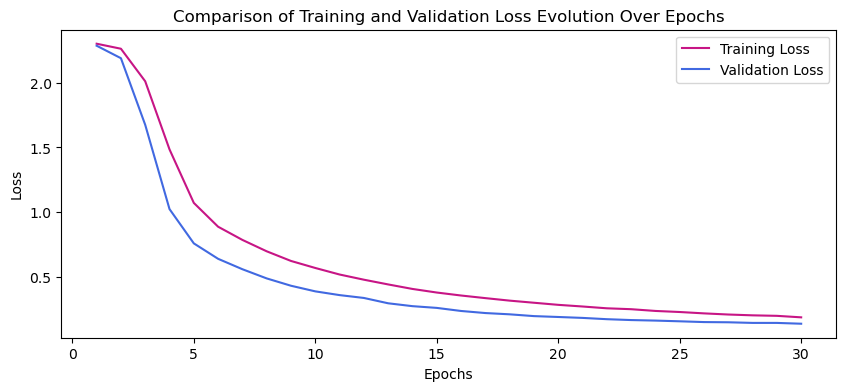

In [46]:
# num_epochs = 30, lr = 0.01, four hidden layers with Dropout, dropout = 0.2, l2 = 0, batch_size = 128: 
model_mb_drop41 = CustomNeuralNetworkDropout4(0.2)
loss_train, loss_val_list = model_gd(30, 0.01, model_mb_drop41, 0, 128)
visualize_loss(loss_train, loss_val_list)

Epoch: 0 | Loss: 2.28441, Acc: 40.62% | Validation Loss: 2.22255, Validation Acc: 28.07%
Epoch: 10 | Loss: 0.28972, Acc: 96.88% | Validation Loss: 0.19389, Validation Acc: 94.69%
Epoch: 20 | Loss: 0.16271, Acc: 95.31% | Validation Loss: 0.13838, Validation Acc: 96.32%
Epoch: 29 | Loss: 0.12027, Acc: 98.44% | Validation Loss: 0.11592, Validation Acc: 97.01%


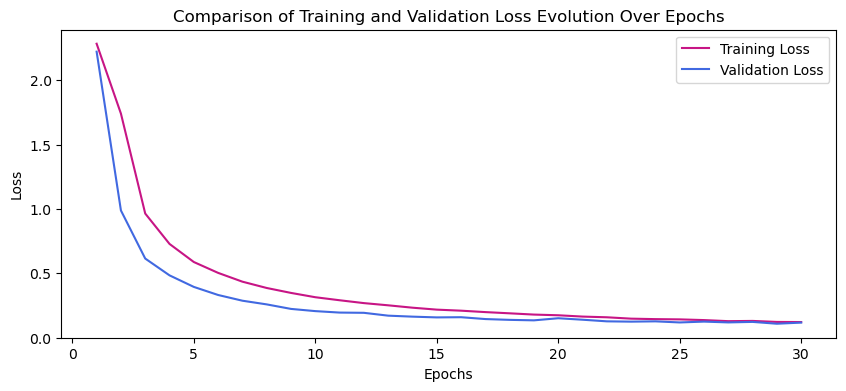

In [47]:
# num_epochs = 30, lr = 0.01, four hidden layers with Dropout, dropout = 0.2, l2 = 0, batch_size = 64:  
model_mb_drop42 = CustomNeuralNetworkDropout4(0.2)
loss_train, loss_val_list = model_gd(30, 0.01, model_mb_drop42, 0, 64)
visualize_loss(loss_train, loss_val_list)

Epoch: 0 | Loss: 1.87429, Acc: 59.38% | Validation Loss: 0.98632, Validation Acc: 65.87%
Epoch: 10 | Loss: 0.16820, Acc: 96.88% | Validation Loss: 0.11738, Validation Acc: 96.79%
Epoch: 20 | Loss: 0.10253, Acc: 100.00% | Validation Loss: 0.09263, Validation Acc: 97.58%
Epoch: 29 | Loss: 0.07504, Acc: 100.00% | Validation Loss: 0.09280, Validation Acc: 97.65%


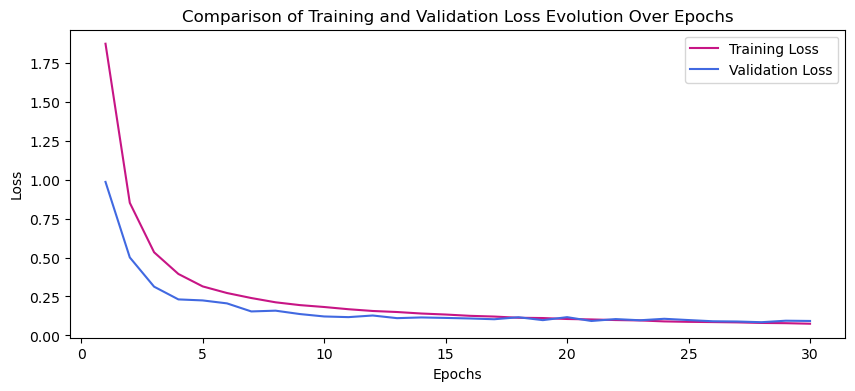

In [48]:
# num_epochs = 30, lr = 0.01, four hidden layers with Dropout, dropout = 0.2, l2 = 0, batch_size = 32:  
model_mb_drop43 = CustomNeuralNetworkDropout4(0.2)
loss_train, loss_val_list = model_gd(30, 0.01, model_mb_drop43, 0, 32)
visualize_loss(loss_train, loss_val_list)

Epoch: 0 | Loss: 1.77547, Acc: 68.75% | Validation Loss: 0.85730, Validation Acc: 72.28%
Epoch: 10 | Loss: 0.12802, Acc: 100.00% | Validation Loss: 0.11748, Validation Acc: 96.67%
Epoch: 20 | Loss: 0.06697, Acc: 100.00% | Validation Loss: 0.08442, Validation Acc: 97.68%
Epoch: 29 | Loss: 0.04721, Acc: 96.88% | Validation Loss: 0.08753, Validation Acc: 97.73%


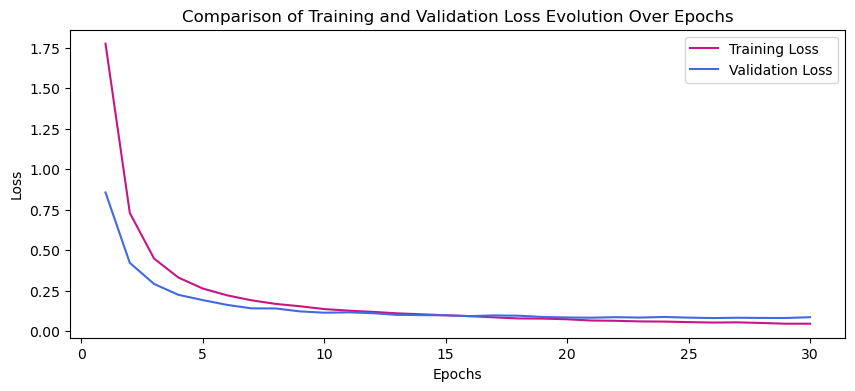

In [49]:
# num_epochs = 30, lr = 0.01, four hidden layers with Dropout, dropout = 0.1, l2 = 0, batch_size = 32:  
model_mb_drop4 = CustomNeuralNetworkDropout4(0.1)
loss_train, loss_val_list = model_gd(30, 0.01, model_mb_drop4, 0, 32)
visualize_loss(loss_train, loss_val_list)

Epoch: 0 | Loss: 1.40293, Acc: 84.38% | Validation Loss: 0.54047, Validation Acc: 83.38%
Epoch: 10 | Loss: 0.13113, Acc: 99.22% | Validation Loss: 0.10639, Validation Acc: 97.22%
Epoch: 20 | Loss: 0.08412, Acc: 98.44% | Validation Loss: 0.09827, Validation Acc: 97.49%
Early stopping at epoch 28,with 0.08805 validation loss


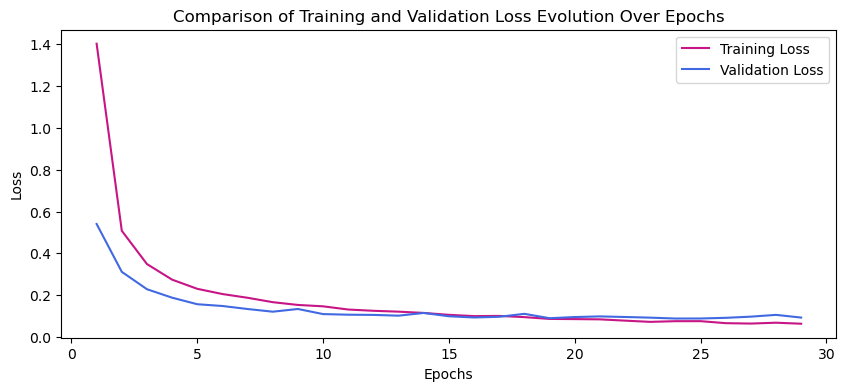

In [50]:
# num_epochs = 30, lr = 0.1, four hidden layers with Dropout, dropout = 0.2, l2 = 0, batch_size = 128:  
model_mb_drop44 = CustomNeuralNetworkDropout4(0.2)
loss_train, loss_val_list = model_gd(30, 0.1, model_mb_drop44, 0, 128)
visualize_loss(loss_train, loss_val_list)

Epoch: 0 | Loss: 1.04552, Acc: 96.88% | Validation Loss: 0.40034, Validation Acc: 87.97%
Epoch: 10 | Loss: 0.11950, Acc: 100.00% | Validation Loss: 0.10178, Validation Acc: 97.32%
Epoch: 20 | Loss: 0.07548, Acc: 100.00% | Validation Loss: 0.09435, Validation Acc: 97.46%
Early stopping at epoch 28,with 0.08790 validation loss


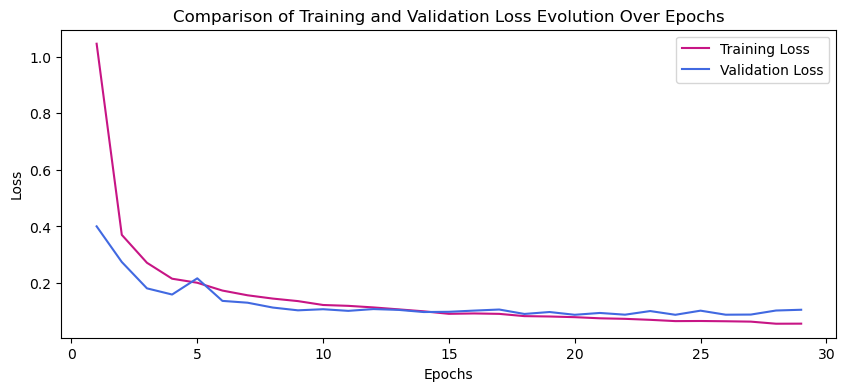

In [51]:
# num_epochs = 30, lr = 0.1, four hidden layers with Dropout, dropout = 0.2, l2 = 0, batch_size = 64:  
model_mb_drop45 = CustomNeuralNetworkDropout4(0.2)
loss_train, loss_val_list = model_gd(30, 0.1, model_mb_drop45, 0, 64)
visualize_loss(loss_train, loss_val_list)

Epoch: 0 | Loss: 0.78181, Acc: 93.75% | Validation Loss: 0.36638, Validation Acc: 89.37%
Epoch: 10 | Loss: 0.12467, Acc: 100.00% | Validation Loss: 0.12027, Validation Acc: 96.05%
Early stopping at epoch 16,with 0.08683 validation loss


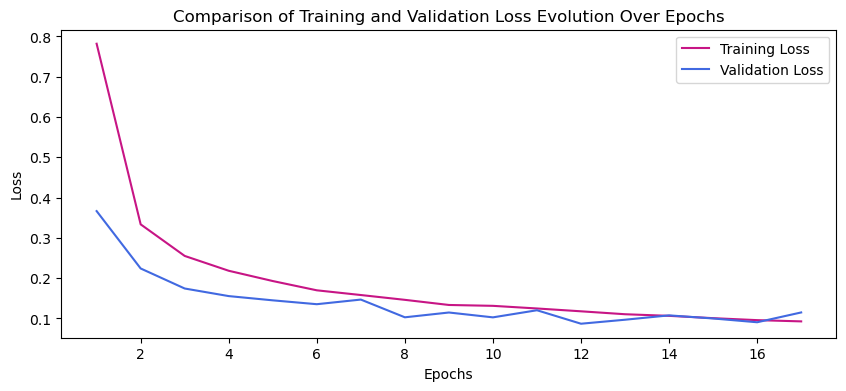

In [52]:
# num_epochs = 30, lr = 0.1, four hidden layers with Dropout, dropout = 0.2, l2 = 0, batch_size = 32:  
model_mb_drop46 = CustomNeuralNetworkDropout4(0.2)
loss_train, loss_val_list = model_gd(30, 0.1, model_mb_drop46, 0, 32)
visualize_loss(loss_train, loss_val_list)

Epoch: 0 | Loss: 0.91423, Acc: 90.62% | Validation Loss: 0.30482, Validation Acc: 90.92%
Epoch: 10 | Loss: 0.08596, Acc: 95.31% | Validation Loss: 0.08455, Validation Acc: 97.72%
Early stopping at epoch 15,with 0.08455 validation loss


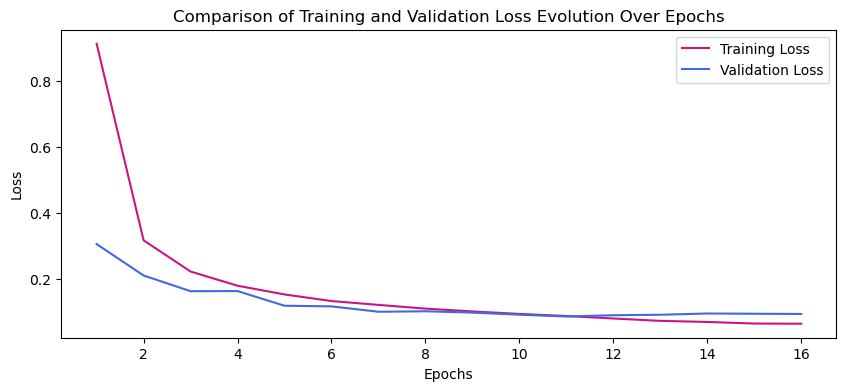

In [55]:
# num_epochs = 30, lr = 0.1, four hidden layers with Dropout, dropout = 0.1, l2 = 0, batch_size = 64: 
model_mb_drop4 = CustomNeuralNetworkDropout4(0.1)
loss_train, loss_val_list = model_gd(30, 0.1, model_mb_drop4, 0, 64)
visualize_loss(loss_train, loss_val_list)

Epoch: 0 | Loss: 0.99490, Acc: 93.75% | Validation Loss: 0.39993, Validation Acc: 88.62%
Epoch: 10 | Loss: 0.16437, Acc: 96.88% | Validation Loss: 0.12844, Validation Acc: 96.26%
Epoch: 20 | Loss: 0.10754, Acc: 100.00% | Validation Loss: 0.09834, Validation Acc: 97.08%
Epoch: 29 | Loss: 0.08476, Acc: 100.00% | Validation Loss: 0.08636, Validation Acc: 97.52%


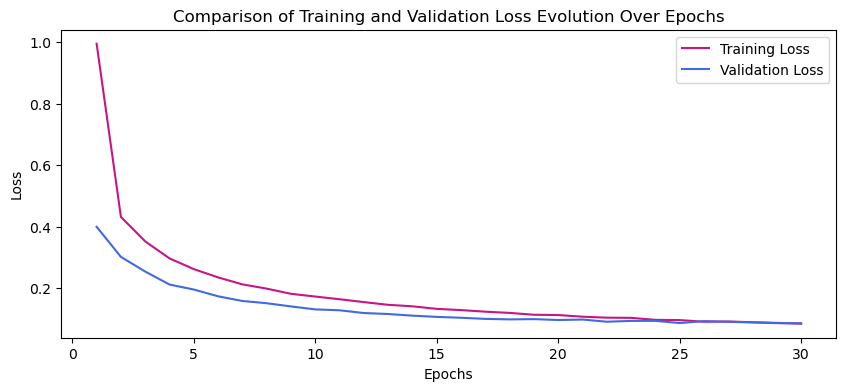

In [57]:
# num_epochs = 30, lr = 0.01, two hidden layers with Dropout, dropout = 0.2, l2 = 0, batch_size = 32:  
model_mb_drop21 = CustomNeuralNetworkDropout2(0.2)
loss_train, loss_val_list = model_gd(30, 0.01, model_mb_drop21, 0, 32)
visualize_loss(loss_train, loss_val_list)

#### The best model is in the next cell:

Epoch: 0 | Loss: 0.90779, Acc: 90.62% | Validation Loss: 0.38358, Validation Acc: 88.98%
Epoch: 10 | Loss: 0.14189, Acc: 100.00% | Validation Loss: 0.12382, Validation Acc: 96.32%
Epoch: 20 | Loss: 0.08686, Acc: 100.00% | Validation Loss: 0.09379, Validation Acc: 97.27%
Epoch: 29 | Loss: 0.06680, Acc: 100.00% | Validation Loss: 0.08299, Validation Acc: 97.54%


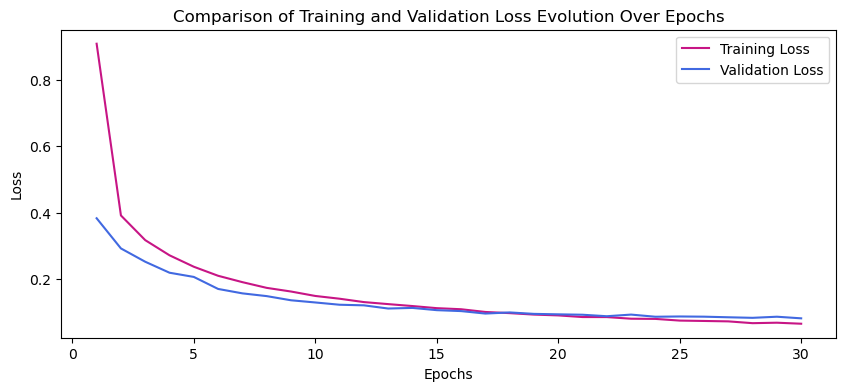

In [58]:
# num_epochs = 30, lr = 0.01, two hidden layers with Dropout, dropout = 0.1, l2 = 0, batch_size = 32:  
model_mb_drop22 = CustomNeuralNetworkDropout2(0.1)
loss_train, loss_val_list = model_gd(30, 0.01, model_mb_drop22, 0, 32)
visualize_loss(loss_train, loss_val_list)

Epoch: 0 | Loss: 0.58339, Acc: 92.19% | Validation Loss: 0.28918, Validation Acc: 91.15%
Epoch: 10 | Loss: 0.11167, Acc: 98.44% | Validation Loss: 0.09228, Validation Acc: 97.38%
Epoch: 20 | Loss: 0.07853, Acc: 98.44% | Validation Loss: 0.09202, Validation Acc: 97.44%
Early stopping at epoch 26,with 0.08290 validation loss


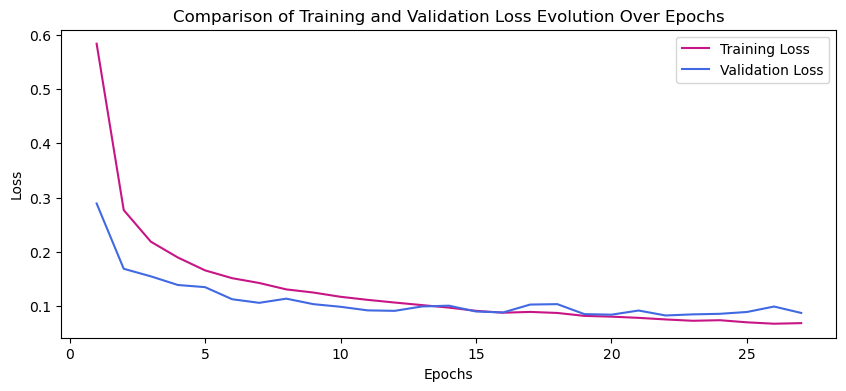

In [59]:
# num_epochs = 30, lr = 0.1, two hidden layers with Dropout, dropout = 0.2, l2 = 0, batch_size = 64:  
model_mb_drop23 = CustomNeuralNetworkDropout2(0.2)
loss_train, loss_val_list = model_gd(30, 0.1, model_mb_drop23, 0, 64)
visualize_loss(loss_train, loss_val_list)

Epoch: 0 | Loss: 0.53622, Acc: 96.88% | Validation Loss: 0.23147, Validation Acc: 92.71%
Epoch: 10 | Loss: 0.07975, Acc: 98.44% | Validation Loss: 0.09729, Validation Acc: 97.24%
Epoch: 20 | Loss: 0.04789, Acc: 100.00% | Validation Loss: 0.08027, Validation Acc: 97.86%
Early stopping at epoch 25,with 0.08027 validation loss


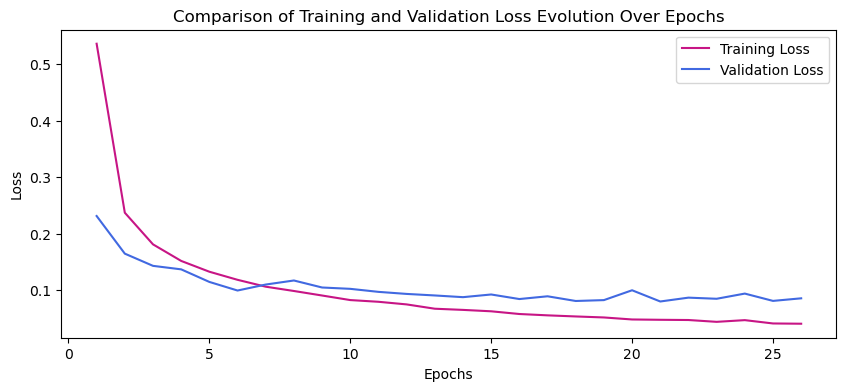

In [60]:
# num_epochs = 30, lr = 0.1, two hidden layers with Dropout, dropout = 0.1, l2 = 0, batch_size = 64:  
model_mb_drop24 = CustomNeuralNetworkDropout2(0.1)
loss_train, loss_val_list = model_gd(30, 0.1, model_mb_drop24, 0, 64)
visualize_loss(loss_train, loss_val_list)

#### model_mb_l2:

Epoch: 0 | Loss: 1.59728, Acc: 86.72% | Validation Loss: 0.81210, Validation Acc: 81.83%
Epoch: 10 | Loss: 0.26905, Acc: 93.75% | Validation Loss: 0.27318, Validation Acc: 92.03%
Epoch: 20 | Loss: 0.19217, Acc: 92.97% | Validation Loss: 0.20199, Validation Acc: 94.33%
Epoch: 29 | Loss: 0.14722, Acc: 97.66% | Validation Loss: 0.16588, Validation Acc: 95.32%


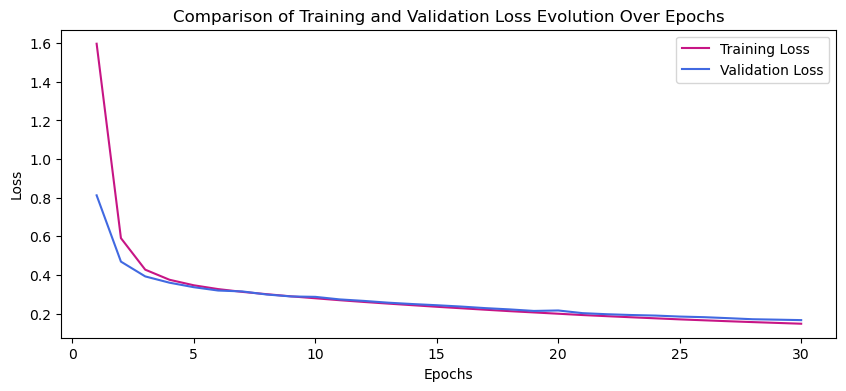

In [62]:
# num_epochs = 30, lr = 0.01, two hidden layers, l2 = 0.001, batch_size = 128: 
model_mb2 = CustomNeuralNetworkB()
loss_train, loss_val_list = model_gd(30, 0.01, model_mb2, 0.001, 128)
visualize_loss(loss_train, loss_val_list)

Epoch: 0 | Loss: 1.61116, Acc: 83.59% | Validation Loss: 0.88058, Validation Acc: 78.83%
Epoch: 10 | Loss: 0.30373, Acc: 88.28% | Validation Loss: 0.30607, Validation Acc: 91.38%
Epoch: 20 | Loss: 0.25738, Acc: 95.31% | Validation Loss: 0.26199, Validation Acc: 92.71%
Epoch: 29 | Loss: 0.22741, Acc: 92.97% | Validation Loss: 0.23399, Validation Acc: 93.62%


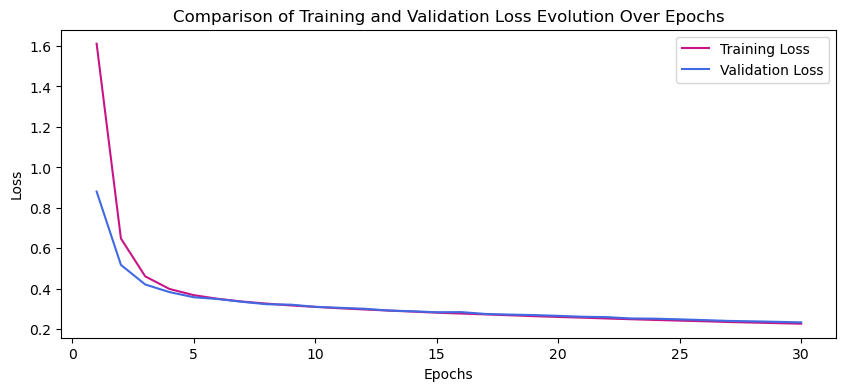

In [63]:
# num_epochs = 30, lr = 0.01, two hidden layers, l2 = 0.01, batch_size = 128:  
model_mb2 = CustomNeuralNetworkB()
loss_train, loss_val_list = model_gd(30, 0.01, model_mb2, 0.01, 128)
visualize_loss(loss_train, loss_val_list)

Epoch: 0 | Loss: 1.87445, Acc: 68.75% | Validation Loss: 1.30723, Validation Acc: 69.84%
Epoch: 10 | Loss: 0.65401, Acc: 82.03% | Validation Loss: 0.65217, Validation Acc: 85.74%
Early stopping at epoch 19,with 0.65200 validation loss


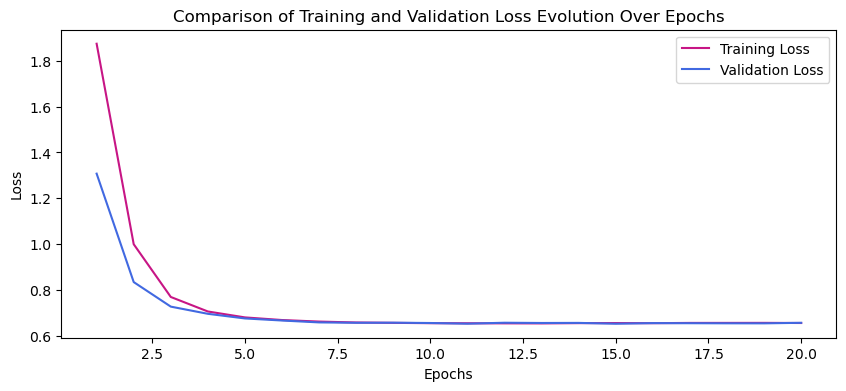

In [64]:
# num_epochs = 30, lr = 0.01, two hidden layers, l2 = 0.1, batch_size = 128:  
model_mb2 = CustomNeuralNetworkB()
loss_train, loss_val_list = model_gd(30, 0.01, model_mb2, 0.1, 128)
visualize_loss(loss_train, loss_val_list)

Epoch: 0 | Loss: 0.63830, Acc: 92.97% | Validation Loss: 0.28758, Validation Acc: 91.13%
Epoch: 10 | Loss: 0.07000, Acc: 98.44% | Validation Loss: 0.10034, Validation Acc: 97.00%
Epoch: 20 | Loss: 0.04190, Acc: 100.00% | Validation Loss: 0.07632, Validation Acc: 97.72%
Early stopping at epoch 21,with 0.07415 validation loss


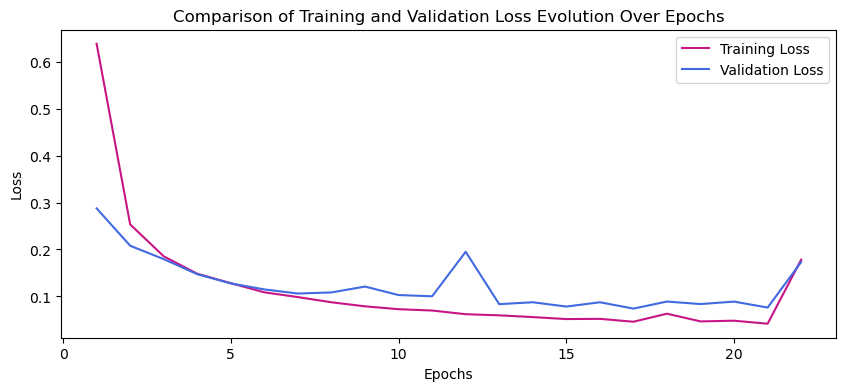

In [65]:
# num_epochs = 30, lr = 0.1, two hidden layers, l2 = 0.001, batch_size = 128: 
model_mb3 = CustomNeuralNetworkB()
loss_train, loss_val_list = model_gd(30, 0.1, model_mb3, 0.001, 128)
visualize_loss(loss_train, loss_val_list)

Epoch: 0 | Loss: 0.68782, Acc: 88.28% | Validation Loss: 0.33717, Validation Acc: 89.87%
Epoch: 10 | Loss: 0.20767, Acc: 91.41% | Validation Loss: 0.20072, Validation Acc: 94.33%
Early stopping at epoch 19,with 0.16641 validation loss


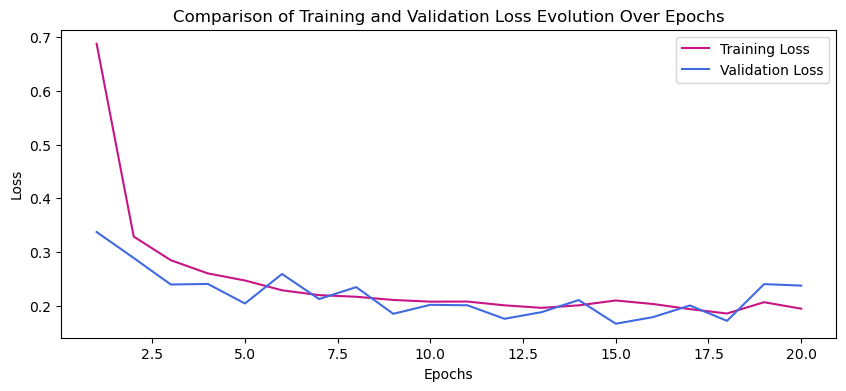

In [66]:
# num_epochs = 30, lr = 0.1, two hidden layers, l2 = 0.01, batch_size = 128:  
model_mb3 = CustomNeuralNetworkB()
loss_train, loss_val_list = model_gd(30, 0.1, model_mb3, 0.01, 128)
visualize_loss(loss_train, loss_val_list)

Epoch: 0 | Loss: 1.09082, Acc: 78.12% | Validation Loss: 0.77712, Validation Acc: 81.10%
Epoch: 10 | Loss: 0.81259, Acc: 83.59% | Validation Loss: 0.72832, Validation Acc: 82.32%
Early stopping at epoch 11,with 0.72707 validation loss


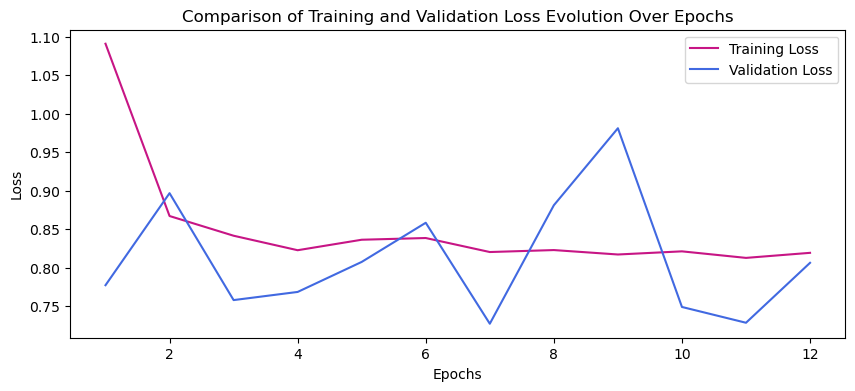

In [67]:
# num_epochs = 30, lr = 0.1, two hidden layers, l2 = 0.1, batch_size = 128: 
model_mb3 = CustomNeuralNetworkB()
loss_train, loss_val_list = model_gd(30, 0.1, model_mb3, 0.1, 128)
visualize_loss(loss_train, loss_val_list)

## SGD - Stochastic Gradient Descent:

#### Utilizing varied hyperparameters for the model_sgd:

#### model_sgd:

Epoch: 0 | Loss: 0.47204, Acc: 100.00% | Validation Loss: 0.22296, Validation Acc: 93.68%
Epoch: 9 | Loss: 0.08096, Acc: 100.00% | Validation Loss: 0.12882, Validation Acc: 96.67%


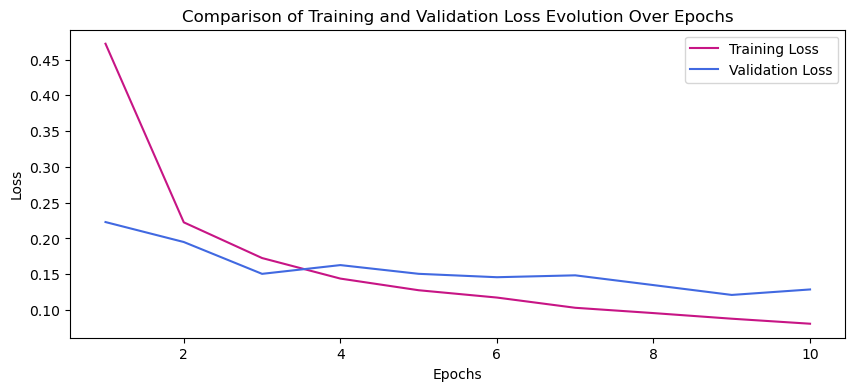

In [68]:
# num_epochs = 10, lr = 0.01, four hidden layers, l2 = 0, batch_size = 1:  
model_sgdX1 = CustomNeuralNetworkX()
loss_train, loss_val_list = model_gd(10, 0.01, model_sgdX1, 0, 1)
visualize_loss(loss_train, loss_val_list)

Epoch: 0 | Loss: 2.32268, Acc: 0.00% | Validation Loss: 2.31776, Validation Acc: 9.83%
Early stopping at epoch 5,with 2.31776 validation loss


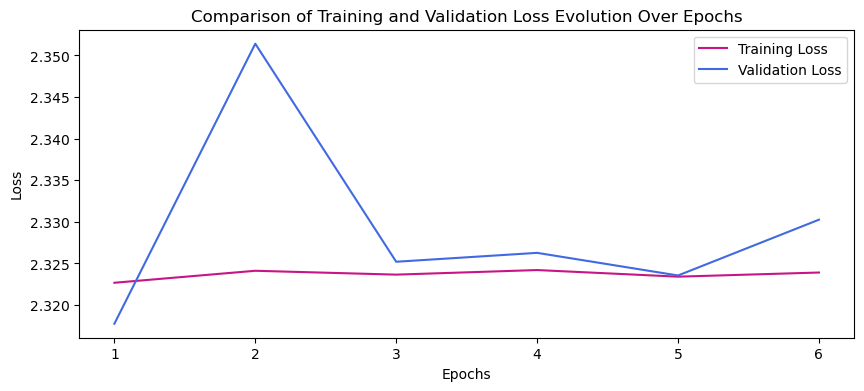

In [69]:
# num_epochs = 10, lr = 0.1, four hidden layers, l2 = 0, batch_size = 1:  
model_sgdX2 = CustomNeuralNetworkX()
loss_train, loss_val_list = model_gd(10, 0.1, model_sgdX2, 0, 1)
visualize_loss(loss_train, loss_val_list)

Epoch: 0 | Loss: 0.43944, Acc: 100.00% | Validation Loss: 0.37202, Validation Acc: 88.91%
Epoch: 9 | Loss: 0.10344, Acc: 100.00% | Validation Loss: 0.14273, Validation Acc: 96.56%


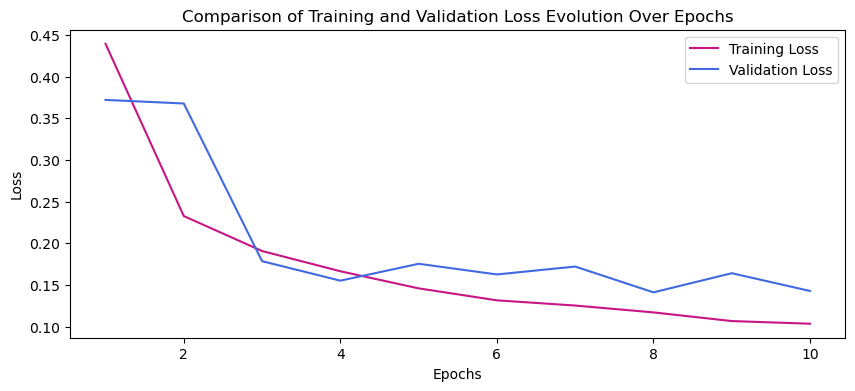

In [70]:
# num_epochs = 10, lr = 0.01, three hidden layers, l2 = 0, batch_size = 1:  
model_sgd1 = CustomNeuralNetworkA()
loss_train, loss_val_list = model_gd(10, 0.01, model_sgd1, 0, 1)
visualize_loss(loss_train, loss_val_list)

Epoch: 0 | Loss: 2.32284, Acc: 0.00% | Validation Loss: 2.32464, Validation Acc: 11.21%
Epoch: 9 | Loss: 2.32423, Acc: 100.00% | Validation Loss: 2.31469, Validation Acc: 9.83%


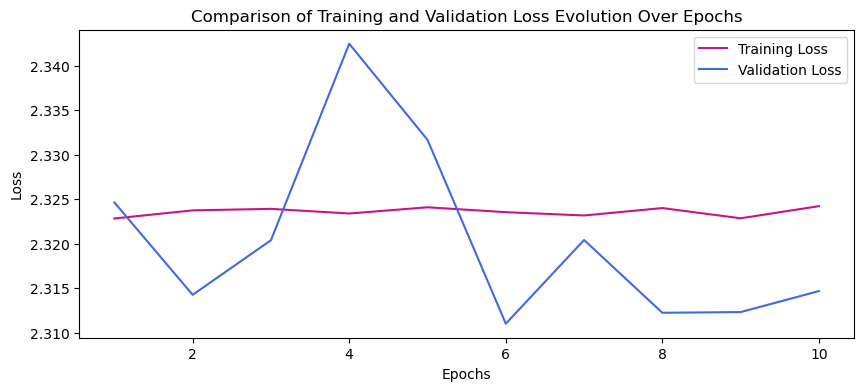

In [71]:
# num_epochs = 10, lr = 0.1, three hidden layers, l2 = 0, batch_size = 1: 
model_sgd2 = CustomNeuralNetworkA()
loss_train, loss_val_list = model_gd(10, 0.1, model_sgd2, 0, 1)
visualize_loss(loss_train, loss_val_list)

#### model_sgd_dropout:

Epoch: 0 | Loss: 0.74203, Acc: 100.00% | Validation Loss: 0.30339, Validation Acc: 91.22%
Early stopping at epoch 9,with 0.20061 validation loss


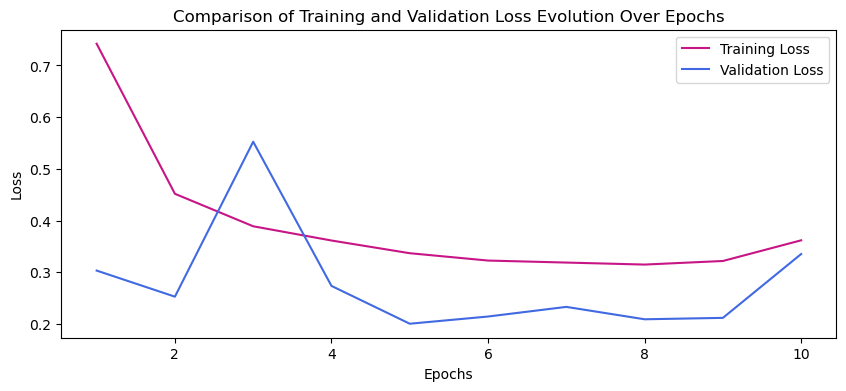

In [72]:
# num_epochs = 10, lr = 0.01, four hidden layers with Dropout, dropout = 0.2, l2 = 0, batch_size = 1:  
model_sgd_drop41 = CustomNeuralNetworkDropout4(0.2)
loss_train, loss_val_list = model_gd(10, 0.01, model_sgd_drop41, 0, 1)
visualize_loss(loss_train, loss_val_list)

Epoch: 0 | Loss: 2.32443, Acc: 0.00% | Validation Loss: 2.32033, Validation Acc: 9.83%
Early stopping at epoch 8,with 2.31462 validation loss


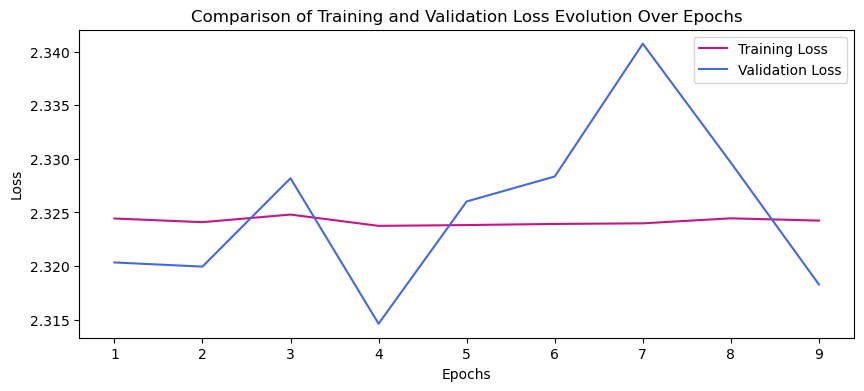

In [73]:
# num_epochs = 10, lr = 0.1, four hidden layers with Dropout, dropout = 0.2, l2 = 0, batch_size = 1:  
model_sgd_drop42 = CustomNeuralNetworkDropout4(0.2)
loss_train, loss_val_list = model_gd(10, 0.1, model_sgd_drop42, 0, 1)
visualize_loss(loss_train, loss_val_list)

Epoch: 0 | Loss: 0.61500, Acc: 100.00% | Validation Loss: 0.25678, Validation Acc: 92.18%
Epoch: 9 | Loss: 0.11178, Acc: 100.00% | Validation Loss: 0.09710, Validation Acc: 97.17%


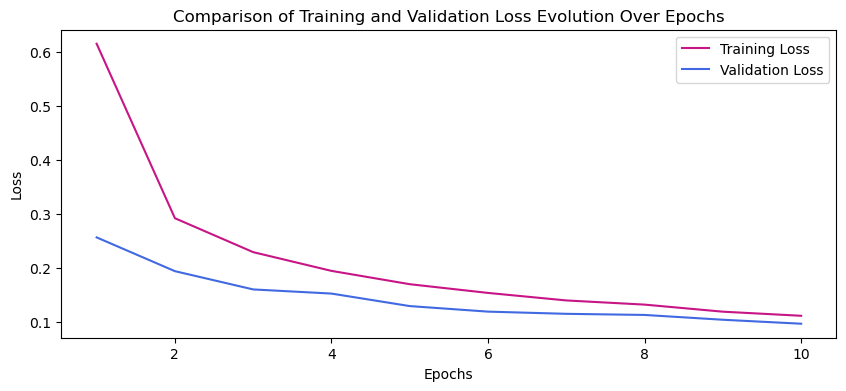

In [92]:
# num_epochs = 10, lr = 0.001, two hidden layers with Dropout, dropout = 0.2, l2 = 0, batch_size = 1:  
model_sgd_drop20 = CustomNeuralNetworkDropout2(0.2)
loss_train, loss_val_list = model_gd(10, 0.001, model_sgd_drop20, 0, 1)
visualize_loss(loss_train, loss_val_list)

Epoch: 0 | Loss: 0.57884, Acc: 100.00% | Validation Loss: 0.40507, Validation Acc: 88.66%
Epoch: 9 | Loss: 0.26616, Acc: 100.00% | Validation Loss: 0.17266, Validation Acc: 95.33%


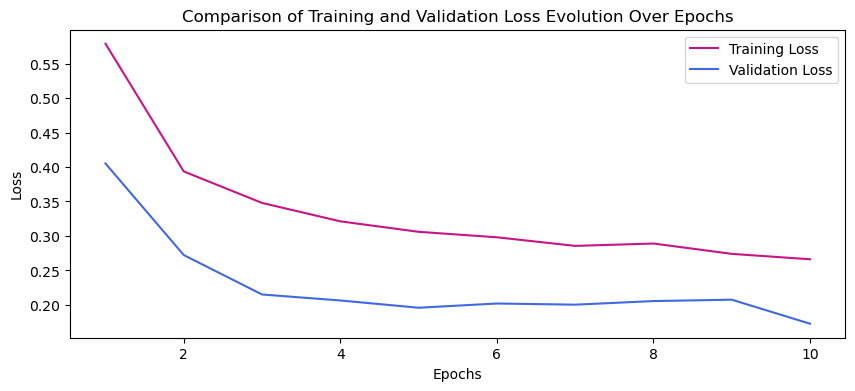

In [74]:
# num_epochs = 10, lr = 0.01, two hidden layers with Dropout, dropout = 0.2, l2 = 0, batch_size = 1:  
model_sgd_drop21 = CustomNeuralNetworkDropout2(0.2)
loss_train, loss_val_list = model_gd(10, 0.01, model_sgd_drop21, 0, 1)
visualize_loss(loss_train, loss_val_list)

Epoch: 0 | Loss: 2.32658, Acc: 0.00% | Validation Loss: 2.31650, Validation Acc: 9.83%
Early stopping at epoch 8,with 2.31329 validation loss


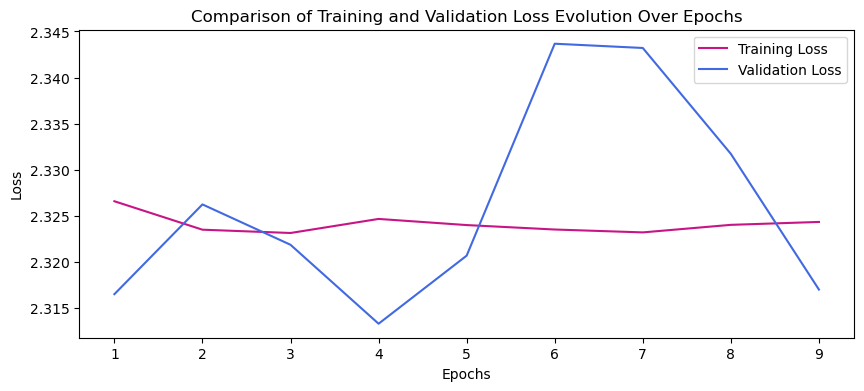

In [75]:
# num_epochs = 10, lr = 0.1, two hidden layers with Dropout, dropout = 0.2, l2 = 0, batch_size = 1:  
model_sgd_drop22 = CustomNeuralNetworkDropout2(0.2)
loss_train, loss_val_list = model_gd(10, 0.1, model_sgd_drop22, 0, 1)
visualize_loss(loss_train, loss_val_list)

Epoch: 0 | Loss: 0.59244, Acc: 100.00% | Validation Loss: 0.32679, Validation Acc: 90.57%
Epoch: 9 | Loss: 0.15882, Acc: 100.00% | Validation Loss: 0.13541, Validation Acc: 96.53%


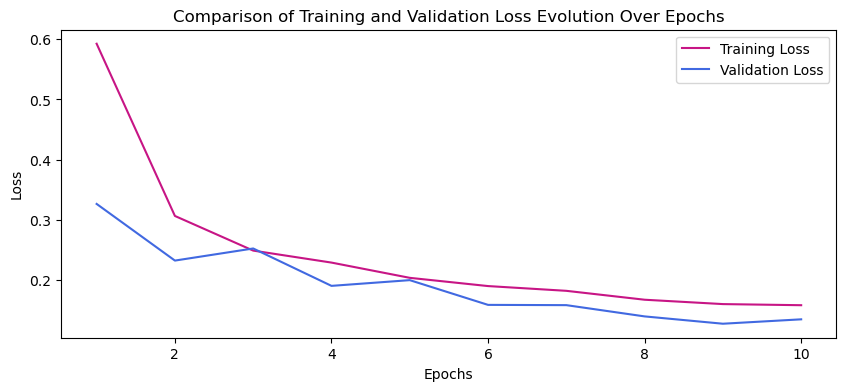

In [76]:
# num_epochs = 10, lr = 0.01, four hidden layers with Dropout, dropout = 0.1, l2 = 0, batch_size = 1:  
model_sgd_drop43 = CustomNeuralNetworkDropout4(0.1)
loss_train, loss_val_list = model_gd(10, 0.01, model_sgd_drop43, 0, 1)
visualize_loss(loss_train, loss_val_list)

Epoch: 0 | Loss: 2.32280, Acc: 0.00% | Validation Loss: 2.31297, Validation Acc: 9.51%
Early stopping at epoch 7,with 2.30626 validation loss


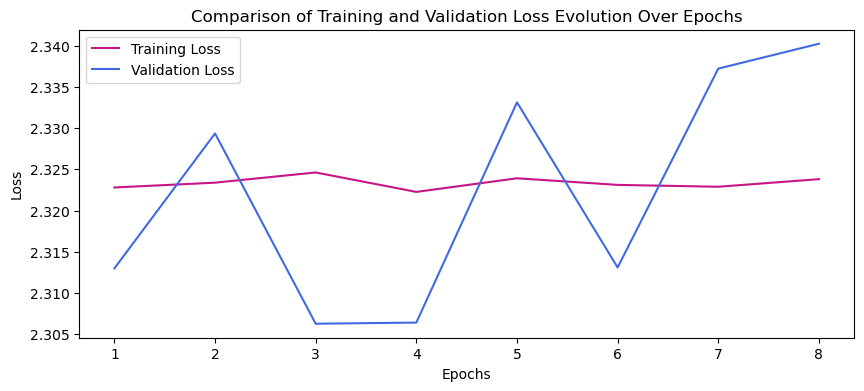

In [77]:
# num_epochs = 10, lr = 0.1, four hidden layers with Dropout, dropout = 0.1, l2 = 0, batch_size = 1:  
model_sgd_drop44 = CustomNeuralNetworkDropout4(0.1)
loss_train, loss_val_list = model_gd(10, 0.1, model_sgd_drop44, 0, 1)
visualize_loss(loss_train, loss_val_list)

Epoch: 0 | Loss: 0.48006, Acc: 100.00% | Validation Loss: 0.28160, Validation Acc: 91.57%
Epoch: 9 | Loss: 0.17125, Acc: 100.00% | Validation Loss: 0.15986, Validation Acc: 95.44%


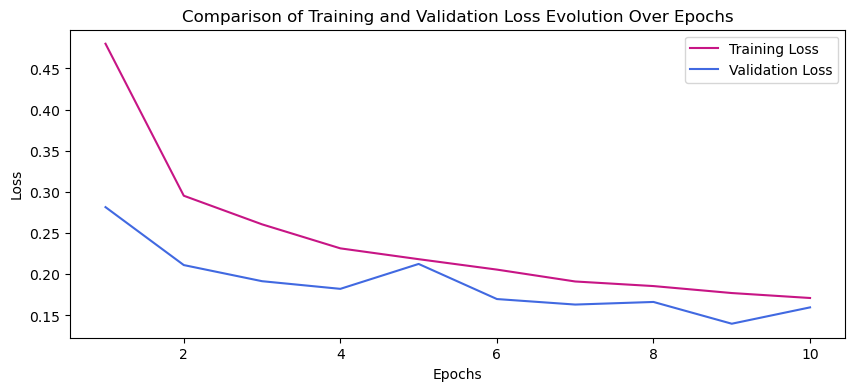

In [78]:
# num_epochs = 10, lr = 0.01, two hidden layers with Dropout, dropout = 0.1, l2 = 0, batch_size = 1:  
model_sgd_drop23 = CustomNeuralNetworkDropout2(0.1)
loss_train, loss_val_list = model_gd(10, 0.01, model_sgd_drop23, 0, 1)
visualize_loss(loss_train, loss_val_list)

Epoch: 0 | Loss: 2.32675, Acc: 0.00% | Validation Loss: 2.32526, Validation Acc: 9.51%
Early stopping at epoch 8,with 2.31259 validation loss


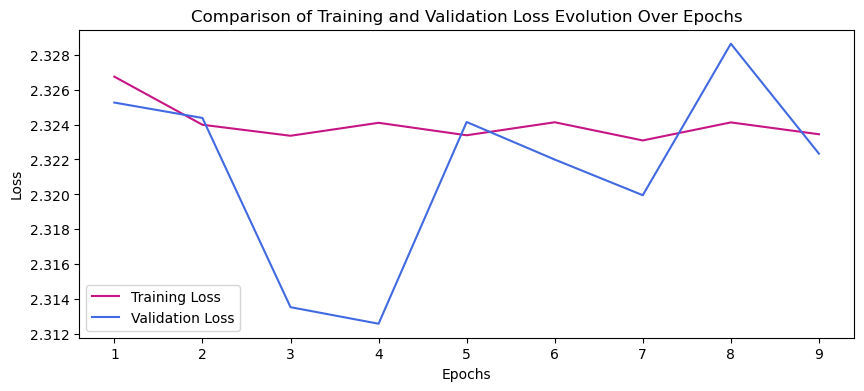

In [79]:
# num_epochs = 10, lr = 0.1, two hidden layers with Dropout, dropout = 0.1, l2 = 0, batch_size = 1: 
model_sgd_drop24 = CustomNeuralNetworkDropout2(0.1)
loss_train, loss_val_list = model_gd(10, 0.1, model_sgd_drop24, 0, 1)
visualize_loss(loss_train, loss_val_list)

#### model_sgd_l2:

Epoch: 0 | Loss: 0.36677, Acc: 100.00% | Validation Loss: 0.25518, Validation Acc: 92.14%
Epoch: 9 | Loss: 0.15237, Acc: 100.00% | Validation Loss: 0.15787, Validation Acc: 95.13%


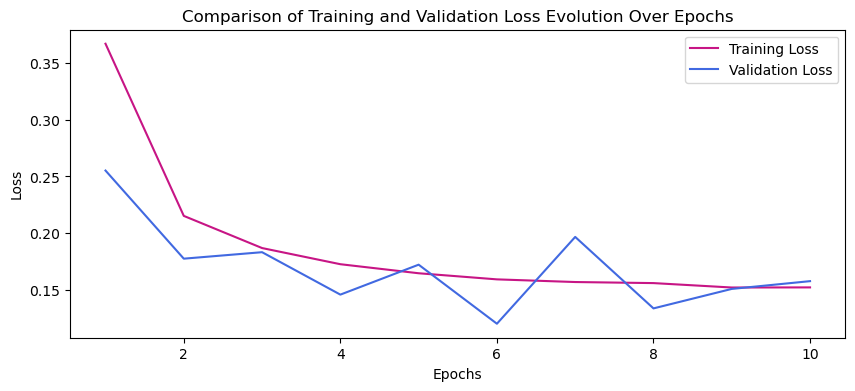

In [80]:
# num_epochs = 10, lr = 0.01, two hidden layers, l2 = 0.001, batch_size = 1:  
model_sgd3 = CustomNeuralNetworkB()
loss_train, loss_val_list = model_gd(10, 0.01, model_sgd3, 0.001, 1)
visualize_loss(loss_train, loss_val_list)

Epoch: 0 | Loss: 0.46748, Acc: 100.00% | Validation Loss: 0.37744, Validation Acc: 88.99%
Early stopping at epoch 6,with 0.28173 validation loss


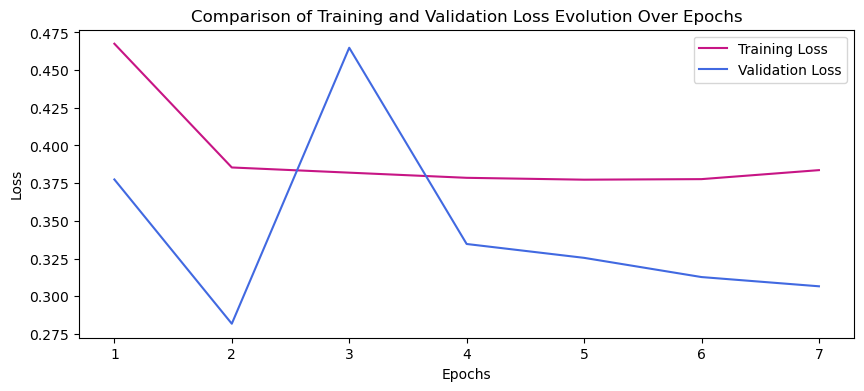

In [81]:
# num_epochs = 10, lr = 0.01, two hidden layers, l2 = 0.01, batch_size = 1: 
model_sgd4 = CustomNeuralNetworkB()
loss_train, loss_val_list = model_gd(10, 0.01, model_sgd4, 0.01, 1)
visualize_loss(loss_train, loss_val_list)

Epoch: 0 | Loss: 0.99828, Acc: 100.00% | Validation Loss: 1.10076, Validation Acc: 60.74%
Early stopping at epoch 7,with 0.84001 validation loss


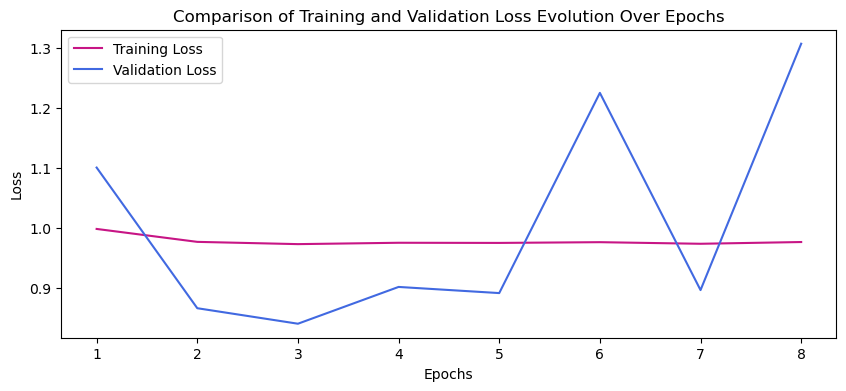

In [82]:
# num_epochs = 10, lr = 0.01, two hidden layers, l2 = 0.1, batch_size = 1:  
model_sgd5 = CustomNeuralNetworkB()
loss_train, loss_val_list = model_gd(10, 0.01, model_sgd5, 0.1, 1)
visualize_loss(loss_train, loss_val_list)

Epoch: 0 | Loss: 2.32175, Acc: 0.00% | Validation Loss: 2.31514, Validation Acc: 9.83%
Early stopping at epoch 5,with 2.31514 validation loss


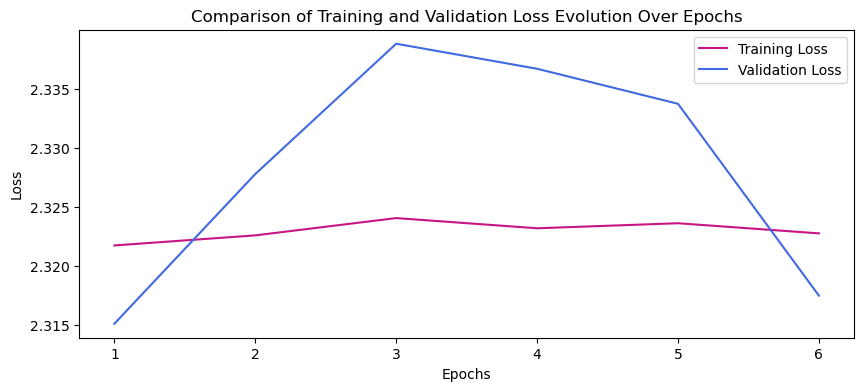

In [83]:
# num_epochs = 10, lr = 0.1, two hidden layers, l2 = 0.001, batch_size = 1:  
model_sgd6 = CustomNeuralNetworkB()
loss_train, loss_val_list = model_gd(10, 0.1, model_sgd6, 0.001, 1)
visualize_loss(loss_train, loss_val_list)

Epoch: 0 | Loss: 2.29995, Acc: 0.00% | Validation Loss: 2.31653, Validation Acc: 10.22%
Epoch: 9 | Loss: 2.32248, Acc: 100.00% | Validation Loss: 2.31711, Validation Acc: 11.21%


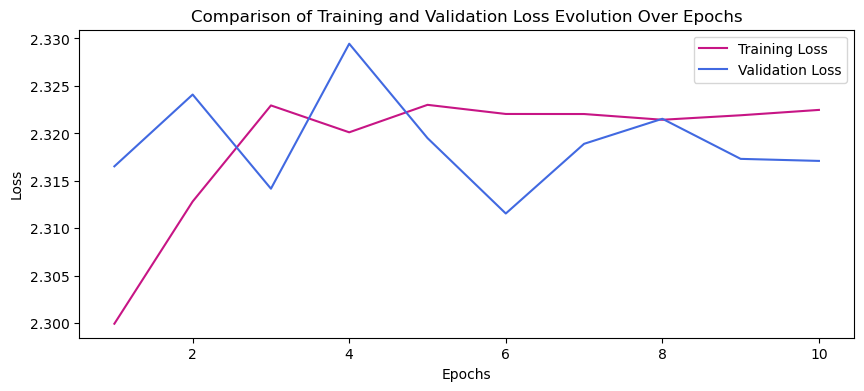

In [84]:
# num_epochs = 10, lr = 0.1, two hidden layers, l2 = 0.01, batch_size = 1:  
model_sgd7 = CustomNeuralNetworkB()
loss_train, loss_val_list = model_gd(10, 0.1, model_sgd7, 0.01, 1)
visualize_loss(loss_train, loss_val_list)

Epoch: 0 | Loss: 2.31272, Acc: 0.00% | Validation Loss: 2.31155, Validation Acc: 9.93%
Early stopping at epoch 9,with 2.30473 validation loss


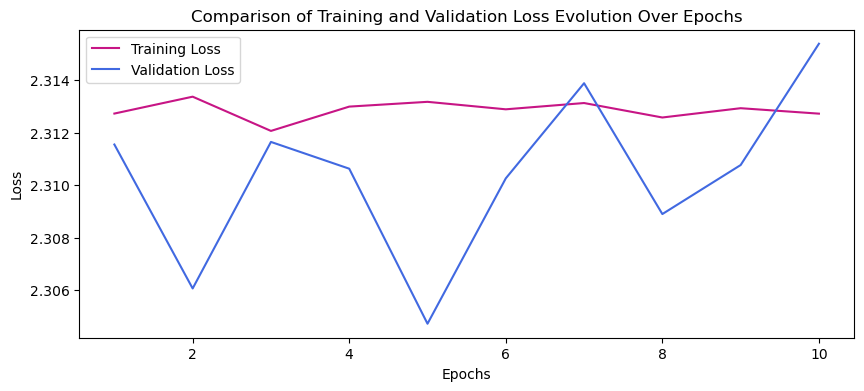

In [85]:
# num_epochs = 10, lr = 0.1, two hidden layers, l2 = 0.1, batch_size = 1:  
model_sgd8 = CustomNeuralNetworkB()
loss_train, loss_val_list = model_gd(10, 0.1, model_sgd8, 0.1, 1)
visualize_loss(loss_train, loss_val_list)

Epoch: 0 | Loss: 0.47283, Acc: 100.00% | Validation Loss: 0.26734, Validation Acc: 91.93%
Epoch: 9 | Loss: 0.06269, Acc: 100.00% | Validation Loss: 0.08971, Validation Acc: 97.37%


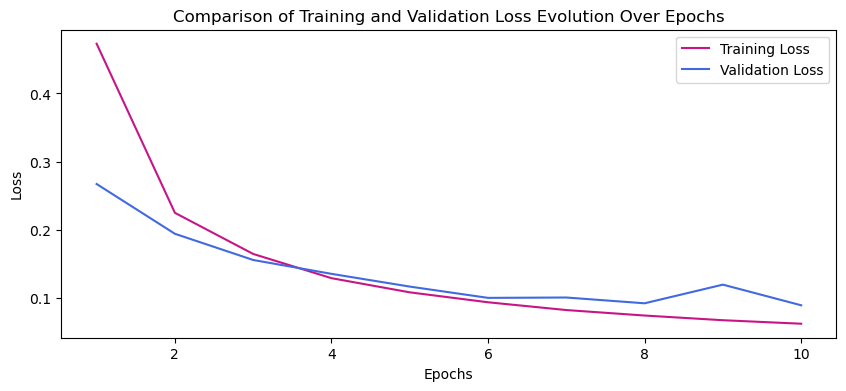

In [89]:
# num_epochs = 10, lr = 0.001, two hidden layers, l2 = 0.001, batch_size = 1:  
model_sgd9 = CustomNeuralNetworkB()
loss_train, loss_val_list = model_gd(10, 0.001, model_sgd9, 0.001, 1)
visualize_loss(loss_train, loss_val_list)

Epoch: 0 | Loss: 0.51728, Acc: 100.00% | Validation Loss: 0.30863, Validation Acc: 91.08%
Epoch: 9 | Loss: 0.17628, Acc: 100.00% | Validation Loss: 0.16996, Validation Acc: 95.45%


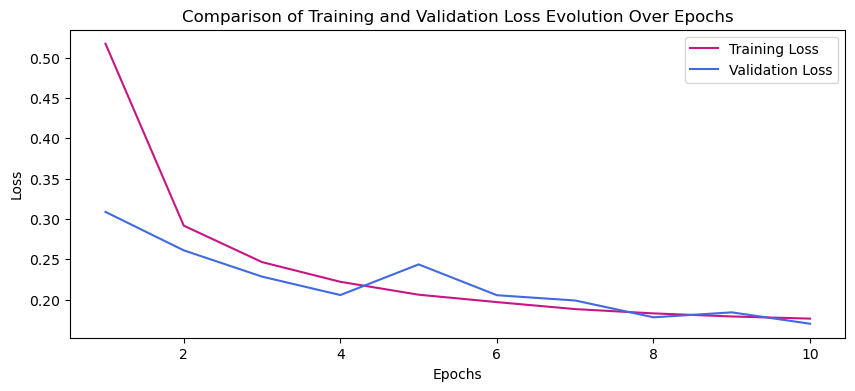

In [90]:
# num_epochs = 10, lr = 0.001, two hidden layers, l2 = 0.01, batch_size = 1:  
model_sgd10 = CustomNeuralNetworkB()
loss_train, loss_val_list = model_gd(10, 0.001, model_sgd10, 0.01, 1)
visualize_loss(loss_train, loss_val_list)

Epoch: 0 | Loss: 0.84274, Acc: 100.00% | Validation Loss: 0.66691, Validation Acc: 84.85%
Early stopping at epoch 5,with 0.66691 validation loss


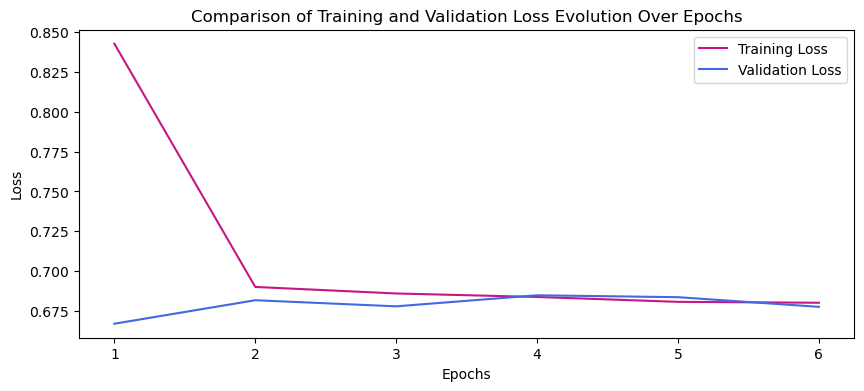

In [91]:
# num_epochs = 10, lr = 0.001, two hidden layers, l2 = 0.1, batch_size = 1:  
model_sgd11 = CustomNeuralNetworkB()
loss_train, loss_val_list = model_gd(10, 0.001, model_sgd11, 0.1, 1)
visualize_loss(loss_train, loss_val_list)

## Test The Train Network:

In [96]:
def model_gd_final(epochs, lr, model, l2, batch_size):
    ModelGD = model
    loss_func = nn.CrossEntropyLoss()
    optimizer = optim.SGD(ModelGD.parameters(), lr=lr, weight_decay=l2)
    num_epochs = epochs
    
    train_final_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle = True)
    
    for epoch in range(num_epochs):
        # Training
        ModelGD.train()
        for batch_idx, (data, target) in enumerate(train_final_loader):
           
            # 1. Forward pass
            output = ModelGD(data)
    
            # 2. Calculate loss
            loss = loss_func(output, target)

            # 3. Optimizer zero grad
            optimizer.zero_grad()

            # 4. Loss backwards
            loss.backward()

            # 5. Optimizer step
            optimizer.step()
            
    return ModelGD

In [97]:
def testing(model):
    test_loader = torch.utils.data.DataLoader(test_set, batch_size=len(test_set))
    loss_func = nn.CrossEntropyLoss()
    # Testing
    model.eval()
    with torch.inference_mode():
        for batch_idx, (data, target) in enumerate(test_loader):
                
            # 1. Forward pass
            output_test = model(data)
            pred_test = torch.softmax(output_test, dim=1).argmax(dim=1)
            
            # 2. Calculate test loss and accuracy
            loss_test = loss_func(output_test, target)
            acc_test = accuracy_index(target, pred_test)
    print(f"Test Loss: {loss_test:.5f}, Test Accuracy: {acc_test:.2f}%")
    return data, target, pred_test

## Test Results:

In [98]:
# num_epochs = 30, lr = 0.01, two hidden layers with Dropout, dropout = 0.1, l2 = 0, batch_size = 32:  
model_gd_test = CustomNeuralNetworkDropout2(0.1)
model = model_gd_final(30, 0.01, model_gd_test, 0, 32)
data, target, pred_test = testing(model)

Test Loss: 0.06681, Test Accuracy: 98.04%


In [171]:
def plot_images(images, labels_true, labels_pred, num_samples=10):
    plt.figure(figsize=(10, 6))
    for i in range(num_samples):
        plt.subplot(2, 5, i + 1)  # 2 rows, 5 columns
        plt.imshow(np.transpose(images[i], (1, 2, 0)), cmap = 'gray') 
        
        # Set the title with individual colors for true and predicted labels
        plt.title('')
        plt.text(0.5, 1.25, f'True: {labels_true[i]}', color='seagreen', fontsize=10, ha='center', va='center', transform=plt.gca().transAxes)
        plt.text(0.5, 1.1, f'Predicted: {labels_pred[i]}', color='mediumvioletred', fontsize=10, ha='center', va='center', transform=plt.gca().transAxes)
        
        plt.axis('off')
    plt.tight_layout()
    plt.show()

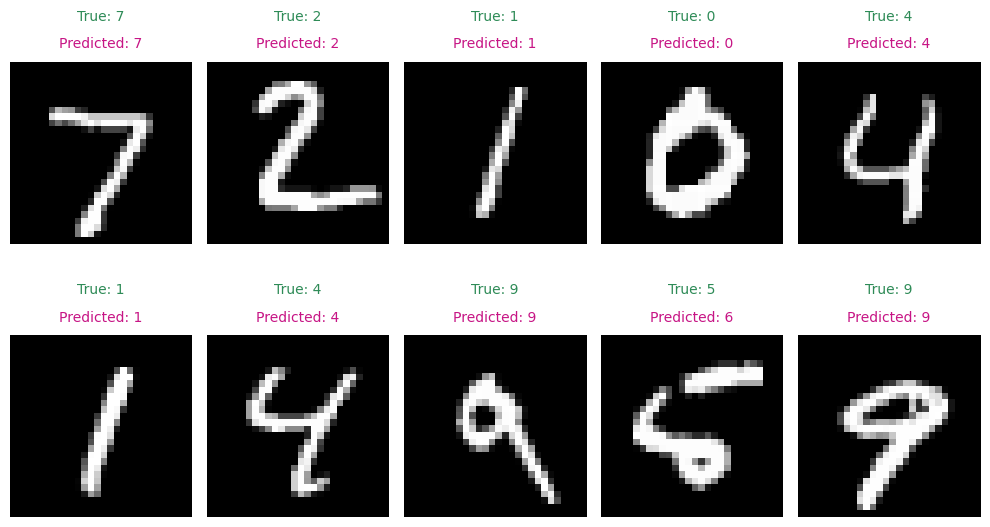

In [172]:
plot_images(data, target, pred_test)

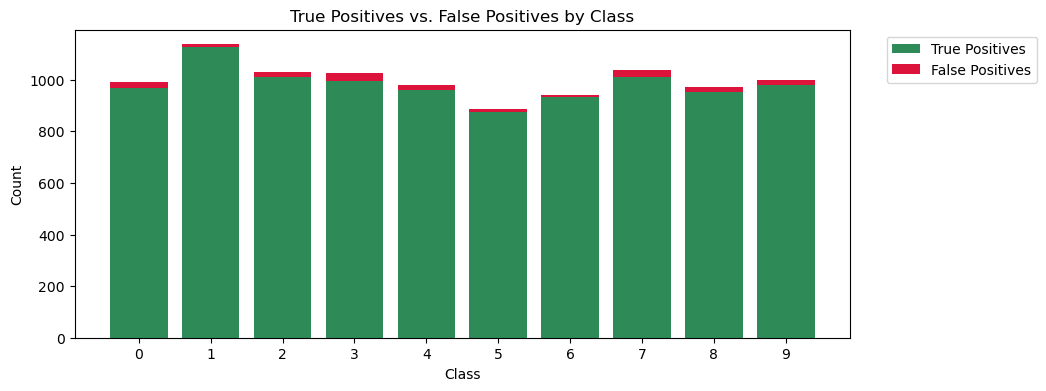

In [165]:
true_positives = np.diag(cm)
false_positives = np.sum(cm, axis=0) - true_positives
plt.figure(figsize=(10, 4))  # Adjust the figure size as needed
plt.bar(range(10), true_positives, color='seagreen', label='True Positives')
plt.bar(range(10), false_positives, bottom=true_positives, color='crimson', label='False Positives')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('True Positives vs. False Positives by Class')  
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1)) 
plt.xticks(range(10))
plt.show()